## Run 1

In [1]:
## LOADING DATA

import pickle

# Load ribociclib data from data/preprocessed 

with open('data/preprocessed/palbociclib_data.pkl', 'rb') as f:
    palbociclib_data = pickle.load(f)

In [2]:
import dynmarker.FeatureSelection as fs 

feature_data, label_data = fs.create_feature_and_label(palbociclib_data)

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.feature_selection import f_regression, SelectKBest
# from sklearn import set_config
# set_config(transform_output = "pandas")

import pandas as pd 

from functools import partial

scaler = Normalizer()
feature_selector = SelectKBest(score_func=f_regression, k=20)
model = ElasticNet()

scores, pval = f_regression(feature_data, label_data)
scores # score for each feature at their respective index

K = 20
mrmr_score_func = partial(fs.mrmr_select_fcq_sklearn, K=K)
mrmr_selector = SelectKBest(mrmr_score_func, k=K)


In [4]:
pipe = Pipeline([('feature_selector', feature_selector), ('regressor', model)])

scores = cross_val_score(pipe, feature_data, label_data, cv=5, scoring='neg_mean_squared_error')

print(f'NORM mean: {-scores.mean():.4f}, std: {scores.std():.4f}')

NORM mean: 1.7761, std: 0.0980


## Run 2 

In [5]:
## LOADING DATA

import pickle
import dynmarker.FeatureSelection as fs 

# Load palbociclib data from data/preprocessed 

with open('data/preprocessed/palbociclib_data.pkl', 'rb') as f:
    palbociclib_data = pickle.load(f)


In [6]:

feature_data, label_data = fs.create_feature_and_label(palbociclib_data)
y_std = label_data.std()
y_std


1.5952913449402224

In [7]:

import pandas as pd
import numpy as np 

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, ElasticNet
from sklearn.svm import LinearSVR, LinearSVC, SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

from dynmarker.EvaluationPipeline import EvaluationPipeline
from dynmarker.FeatureSelection import example_run_model_func


In [8]:
random_eval = EvaluationPipeline()
random_eval.set_function(example_run_model_func)

In [9]:
random_eval.run_function(feature_data, label_data, 10, k_ranges=range(1,201,10), model_list=[LinearRegression(), Lasso(), ElasticNet()], n_cores=6)

--- Finished LinearRegression using 6 cores ---
--- Finished Lasso using 6 cores ---
--- Finished ElasticNet using 6 cores ---


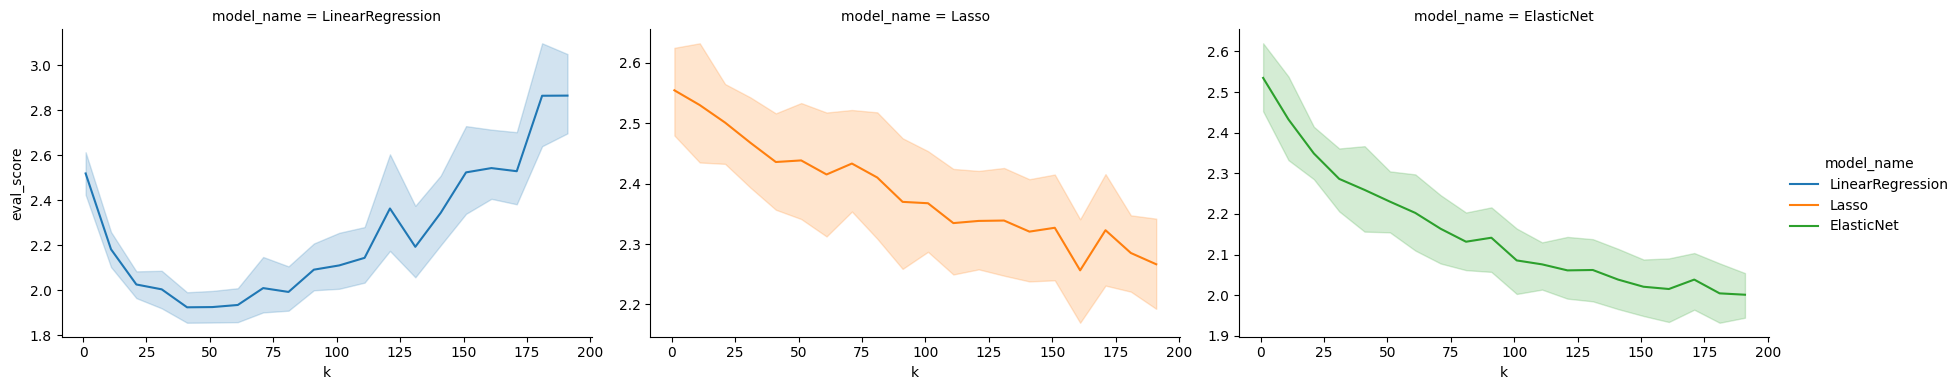

In [10]:
# plot a line plot the average score and std for each k value over the i iterations, show error bar as std

import matplotlib.pyplot as plt
import seaborn as sns

evaluation_df_lite = random_eval.evaluation_df

# get rid of the outliers, 20 times the value of the label data's standard deviation is the cut-off
processed_evaluation_df = evaluation_df_lite[evaluation_df_lite['eval_score'] < y_std*5]
# processed_evaluation_df = evaluation_df_lite

# plot each model on the different figure, multi-figure plot

g = sns.FacetGrid(processed_evaluation_df, col='model_name', col_wrap=3, hue='model_name', height=4, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'k', 'eval_score')
g.add_legend()
# plt.grid()
plt.show()

In [11]:
# train test split using MLPRegressor

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.2, random_state=42)

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_test, y_pred)

print(score)

2.3337973445311193


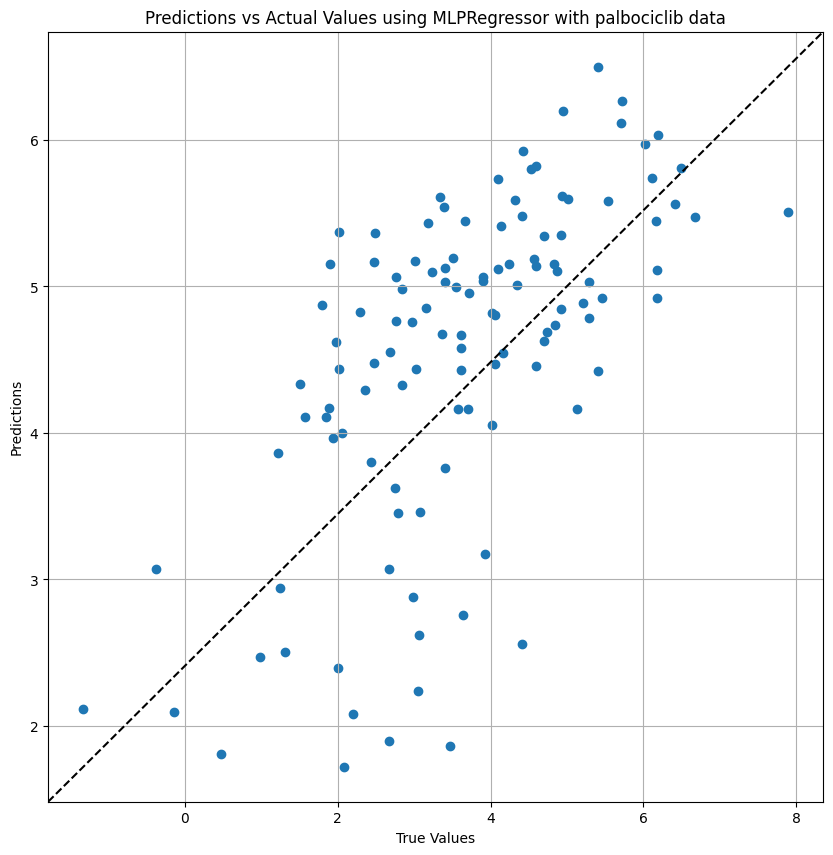

Correlation coefficient: 0.6294, p-value: 0.0000


In [12]:
# plot the predictions vs the actual values

import matplotlib.pyplot as plt

# add in a line of y=x

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls='--', c='k')

# title
plt.title('Predictions vs Actual Values using MLPRegressor with palbociclib data')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()
plt.show()

# pearson correlation coefficient

from scipy.stats import pearsonr

corr, p_val = pearsonr(y_test, y_pred)

# print the correlation coefficient and p-value
print(f'Correlation coefficient: {corr:.4f}, p-value: {p_val:.4f}')



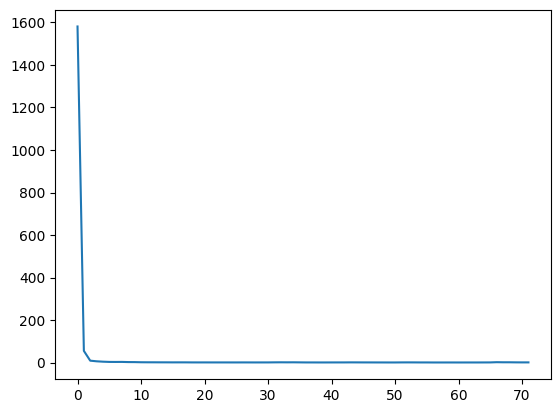

In [13]:
# show loss curve

plt.plot(mlp.loss_curve_)


## Feature Selection in mRNA expression data

In [14]:
import pandas as pd
import pickle

# import GDSC2 drug response data using pickle

with open('data/drug-response/GDSC2/cache_gdsc2.pkl', 'rb') as f:
    gdsc2 = pickle.load(f)
    gdsc2_info = pickle.load(f)

# import CCLE gene expression data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

# import CCLE sample info data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)

# with open('data/protein-interaction/STRING/ccle_to_string_id_df.pkl', 'rb') as f:
#     ccle_to_string_id_df = pickle.load(f)


In [15]:
import DataFunctions as utils

# get the drug response data for palbociclib
palbociclib_data = utils.create_joint_dataset_from_ccle_gdsc2('Palbociclib', gdsc2, ccle, ccle_sample_info)

feature_data, label_data = utils.create_feature_and_label(palbociclib_data)

In [16]:
feature_data.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
SANGER_MODEL_ID,,,,,,,,,,,,,,,,,,,,,
SIDM00872,5.296090,0.000000,6.794416,3.452859,5.260778,0.042644,4.339137,5.833143,7.313246,4.764474,...,1.827819,0.000000,0.847997,1.704872,0.411426,0.000000,1.063503,0.0,0.000000,0.0
SIDM00866,5.214125,0.000000,6.328047,3.168321,4.654206,0.042644,0.432959,6.574102,5.140779,5.114783,...,0.000000,0.000000,0.298658,1.584963,0.695994,0.000000,2.693766,0.0,0.000000,0.0
SIDM00885,5.241840,0.201634,5.615299,3.090853,3.732269,0.084064,0.111031,4.026800,5.471513,6.019480,...,0.632268,0.000000,0.422233,1.250962,0.505891,0.111031,0.070389,0.0,0.111031,0.0
SIDM00884,3.481557,0.000000,7.070389,2.341986,3.679199,0.176323,3.420887,5.854494,5.976134,5.112283,...,2.327687,0.226509,0.650765,2.477677,0.000000,0.000000,0.042644,0.0,0.084064,0.0
SIDM00874,4.903038,0.000000,7.177719,2.744161,4.648465,0.150560,0.070389,5.819924,4.374344,3.814550,...,2.440952,1.695994,0.367371,1.505891,0.214125,0.137504,0.704872,0.0,0.000000,0.0


In [17]:
feature_data.shape

(584, 19221)

In [18]:
label_data.head()

SANGER_MODEL_ID
SIDM00872    4.887773
SIDM00866    5.065262
SIDM00885    4.133027
SIDM00884    3.310621
SIDM00874    5.586256
Name: LN_IC50, dtype: float64

In [19]:
# using f-regression to select the top 20 features 

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=20)
selector.fit(feature_data, label_data)

# get the selected features

selected_features = feature_data.columns[selector.get_support()]

selected_features


Index(['WAS', 'BCAR1', 'NCKAP1', 'ARHGAP15', 'RPL3', 'TJP1', 'RASAL3',
       'AMOTL2', 'NCKAP1L', 'SDC4', 'LAMA5', 'SLC49A4', 'PTPRF', 'CD53',
       'TUFT1', 'PTPN7', 'PPIC', 'PXDC1', 'P2RY8', 'IKZF1'],
      dtype='object')

#### Simple run

score using selected features: 1.9091, score using all features: 1.8443


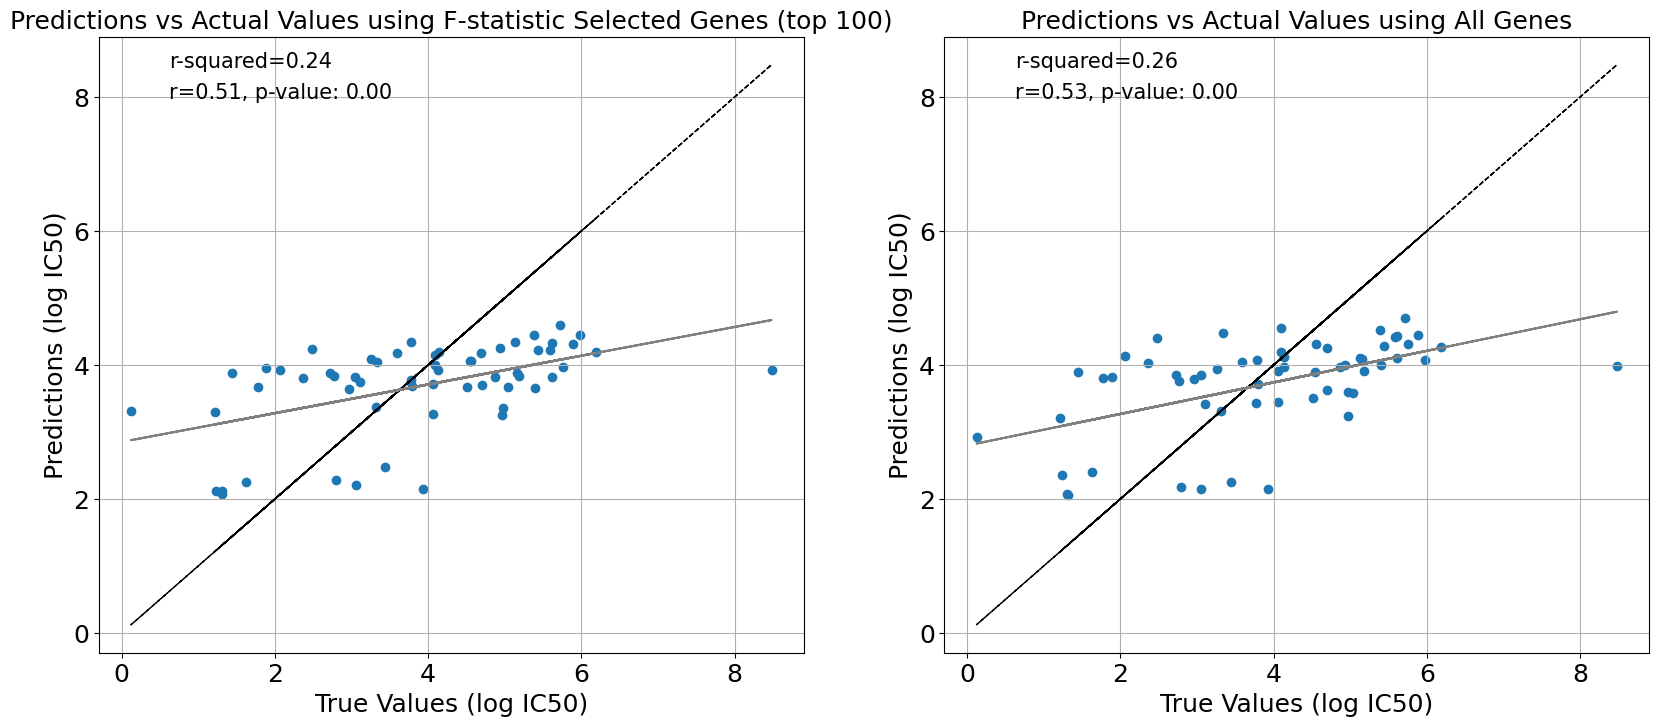

In [20]:
# split the data into train and test set

from sklearn.model_selection import train_test_split

# using f-regression to select the top n features 

from sklearn.feature_selection import SelectKBest, f_regression

# import lasso regression model

from sklearn.linear_model import ElasticNet

# import neural network model

from sklearn.neural_network import MLPRegressor

# import xgboost model

from xgboost import XGBRegressor

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.1, 
                                                    random_state=np.random.randint(1000))

# perform feature selection on the training set

selector = SelectKBest(f_regression, k=100)
selector.fit(X_train, y_train)

# get the selected features

selected_features = X_train.columns[selector.get_support()]

# train the model on the selected features

model = ElasticNet()
model.fit(X_train[selected_features], y_train)

lasso_all_features = ElasticNet()
lasso_all_features.fit(X_train, y_train)

# get the predictions

y_pred = model.predict(X_test[selected_features])
predictions_all_features = lasso_all_features.predict(X_test)

# get the score

from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_test, y_pred)
score_all = mean_squared_error(y_test, predictions_all_features)

print(f'score using selected features: {score:.4f}, score using all features: {score_all:.4f}')

# plot the predictions vs the actual values

import matplotlib.pyplot as plt
import Visualisation as vis

# make a 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20,8))

# for each axis, plot the predictions vs the actual values
vis.plot_predictions_vs_actual_values(y_test, y_pred, ax=ax[0], 
                                      title='Predictions vs Actual Values using F-statistic Selected Genes (top 100)',
                                      x_label='True Values (log IC50)', y_label='Predictions (log IC50)',
                                      minitext_size=15)
vis.plot_predictions_vs_actual_values(y_test, predictions_all_features, ax=ax[1], 
                                      title='Predictions vs Actual Values using All Genes',
                                      x_label='True Values (log IC50)', y_label='Predictions (log IC50)',
                                      minitext_size=15)

# show the plot
plt.show()


#### Bulk run

In [21]:
# iterate feature selection for {repeat} times 
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# import elastic net regression model and random forest regression model

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

run_code_block = True

if run_code_block:

    repeats = 100
    test_size = 0.1
    exp_ids = ['ANOVA 10 Genes', 'ANOVA 100 Genes', 'ANOVA 1000 Genes', 'All Genes']
    feature_selection_size = [10, 100, 1000, feature_data.shape[1]]

    data = []
    data_column_names = ['exp_id', 'random_seed', 'score', 'y_pred', 'y_test', 'selected_features', 'pearson_corr', 'pearson_p_val', 'r_squared']

    for i in range(repeats):
        random_seed = np.random.randint(1000)
        X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=test_size, 
                                                            random_state=random_seed)

        for exp_id, k in zip(exp_ids, feature_selection_size):
            selector = SelectKBest(f_regression, k=k)
            selector.fit(X_train, y_train)
            selected_features = X_train.columns[selector.get_support()].tolist()
            model = ElasticNet()
            model.fit(X_train[selected_features], y_train)
            y_pred = model.predict(X_test[selected_features])
            score = mean_squared_error(y_test, y_pred)
            corr, p_val = pearsonr(y_test, y_pred)
            r_squared = r2_score(y_test, y_pred)

            # print debug info
            print(f'iteration: {i}, score: {score:.4f}, pearson corr: {corr:.4f}, pearson p_val: {p_val:.4f}, r_squared: {r_squared:.4f}')

            row = [exp_id, random_seed, score, y_pred, y_test.tolist(), selected_features, corr, p_val, r_squared]
            data.append(row)

    # save result in a dataframe
    collection_df_gene_freg = pd.DataFrame(data, columns=data_column_names)

    # save the dataframe to a pickle file
    with open('data/processed-results/elastic_net_freg_results_ccle_palbociclib.pkl', 'wb') as f:
        pickle.dump(collection_df_gene_freg, f)

iteration: 0, score: 1.8888, pearson corr: 0.6743, pearson p_val: 0.0000, r_squared: 0.3801
iteration: 0, score: 1.9307, pearson corr: 0.6504, pearson p_val: 0.0000, r_squared: 0.3664
iteration: 0, score: 1.9154, pearson corr: 0.6400, pearson p_val: 0.0000, r_squared: 0.3714
iteration: 0, score: 1.9074, pearson corr: 0.6443, pearson p_val: 0.0000, r_squared: 0.3740
iteration: 1, score: 1.5182, pearson corr: 0.6272, pearson p_val: 0.0000, r_squared: 0.3691
iteration: 1, score: 1.5032, pearson corr: 0.6359, pearson p_val: 0.0000, r_squared: 0.3754
iteration: 1, score: 1.5106, pearson corr: 0.6265, pearson p_val: 0.0000, r_squared: 0.3723
iteration: 1, score: 1.4873, pearson corr: 0.6377, pearson p_val: 0.0000, r_squared: 0.3820
iteration: 2, score: 1.7992, pearson corr: 0.4803, pearson p_val: 0.0001, r_squared: 0.2296
iteration: 2, score: 1.7947, pearson corr: 0.4831, pearson p_val: 0.0001, r_squared: 0.2316
iteration: 2, score: 1.8395, pearson corr: 0.4637, pearson p_val: 0.0002, r_squa

In [22]:
# std and mean of pearson correlation
print(f'pearson correlation mean: {collection_df_gene_freg["pearson_corr"].mean():.4f}, std: {collection_df_gene_freg["pearson_corr"].std():.4f}')

pearson correlation mean: 0.5837, std: 0.0871


In [23]:
# open from pickle 

with open('data/processed-results/elastic_net_freg_results_ccle_palbociclib.pkl', 'rb') as f:
    collection_df_gene_freg = pickle.load(f)

collection_df_gene_freg.head()

,exp_id,random_seed,score,y_pred,y_test,selected_features,pearson_corr,pearson_p_val,r_squared
0,ANOVA 10 Genes,26,1.888841,"[4.127837266261298, 3.7537953777197535, 4.3150...","[3.771861, 4.572241, 6.118066, 2.916915, 4.010...","[WAS, RPL3, AMOTL2, NCKAP1L, SDC4, LAMA5, SLC4...",0.674285,4.784614e-09,0.380108
1,ANOVA 100 Genes,26,1.930691,"[3.907531315253844, 3.4629151582914743, 4.3612...","[3.771861, 4.572241, 6.118066, 2.916915, 4.010...","[TSPAN6, ITGA3, TNFRSF12A, BAIAP2L1, TRAF3IP3,...",0.650367,2.473963e-08,0.366374
2,ANOVA 1000 Genes,26,1.915424,"[3.567838805317341, 3.256566723495472, 4.19808...","[3.771861, 4.572241, 6.118066, 2.916915, 4.010...","[TSPAN6, FGR, FUCA2, CD38, TSPOAP1, ITGAL, ITG...",0.639979,4.831974e-08,0.371384
3,All Genes,26,1.907370,"[3.5264062532014506, 3.322026560074759, 4.2525...","[3.771861, 4.572241, 6.118066, 2.916915, 4.010...","[TSPAN6, TNMD, DPM1, SCYL3, C1orf112, FGR, CFH...",0.644258,3.678835e-08,0.374027
4,ANOVA 10 Genes,956,1.518207,"[2.0789974843188044, 3.2182653584152057, 3.462...","[1.806095, 4.061147, 3.420745, 5.289123, 2.475...","[WAS, RPL3, AMOTL2, NCKAP1L, SDC4, LAMA5, SLC4...",0.627236,1.062128e-07,0.369144


#### Using Linear Regression

random state value: 8539


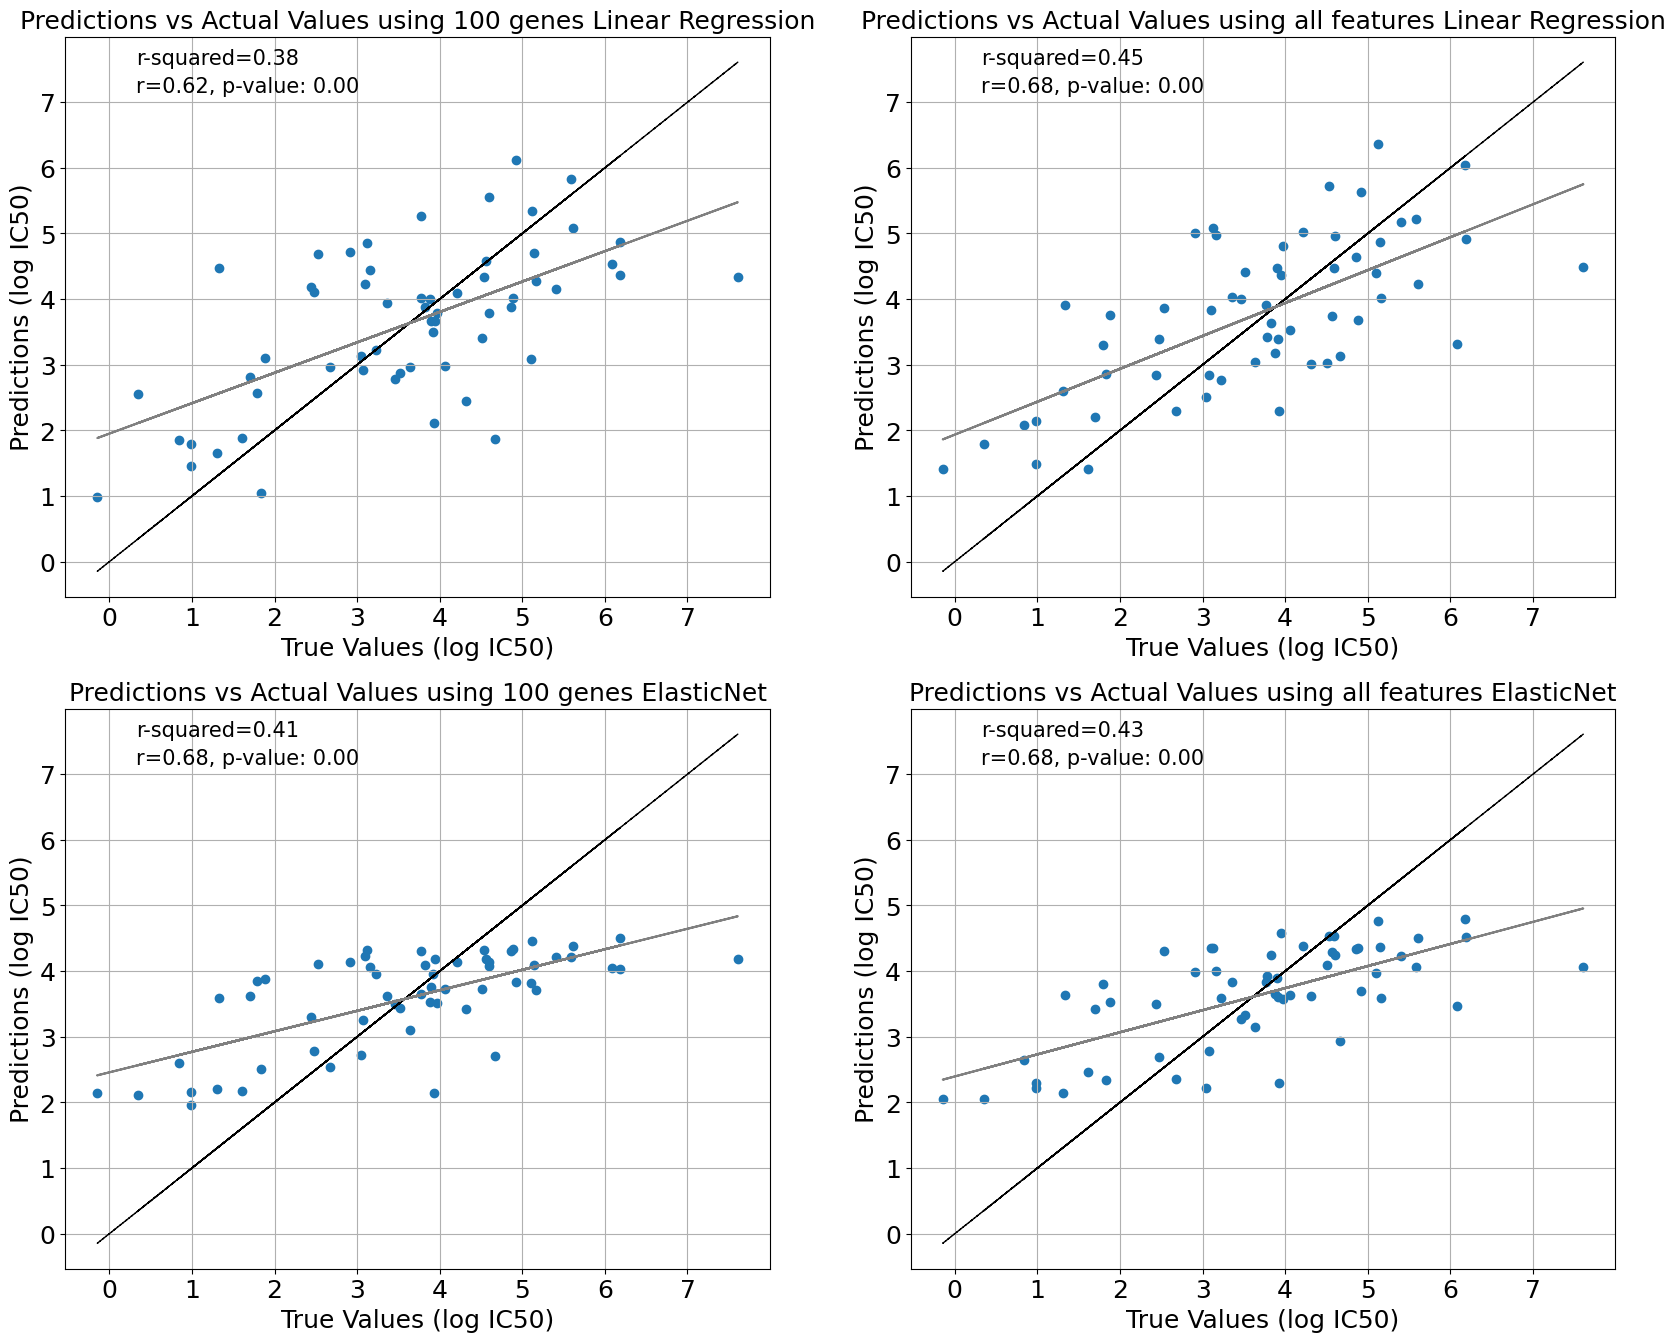

In [24]:
# split the data into train and test set

from sklearn.model_selection import train_test_split

# using f-regression to select the top n features 

from sklearn.feature_selection import SelectKBest, f_regression

# import lasso regression model

from sklearn.linear_model import ElasticNet, LinearRegression

# import neural network model

from sklearn.neural_network import MLPRegressor

# import xgboost model

from xgboost import XGBRegressor

import numpy as np

random_state_value = np.random.randint(10000)

print(f'random state value: {random_state_value}')

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.1, 
                                                    random_state=random_state_value)

# perform feature selection on the training set

selector = SelectKBest(f_regression, k=100)
selector.fit(X_train, y_train)

# get the selected features

selected_features = X_train.columns[selector.get_support()]

# train the model on the selected features

model = LinearRegression()
model.fit(X_train[selected_features], y_train)

model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)

default_model = ElasticNet()
default_model.fit(X_train[selected_features], y_train)

default_model_all_features = ElasticNet()
default_model_all_features.fit(X_train, y_train)

# get the predictions

y_pred = model.predict(X_test[selected_features])
predictions_all_features = model_all_features.predict(X_test)

predictions_default = default_model.predict(X_test[selected_features])
predictions_all_features_default = default_model_all_features.predict(X_test)

# plot the predictions vs the actual values

import matplotlib.pyplot as plt
import Visualisation as vis

all_predictions = [y_pred, predictions_all_features, predictions_default, predictions_all_features_default]
model_names = ['100 genes Linear Regression', 'all features Linear Regression', '100 genes ElasticNet', 'all features ElasticNet']

# make a 1x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(20,16))

# for each axis, plot the predictions vs the actual values, use ax.flatten 
# to flatten the 2x2 array into a 1D array
for i, ax in enumerate(axes.flatten()):
    vis.plot_predictions_vs_actual_values(y_test, all_predictions[i], ax=ax, 
                                          title=f'Predictions vs Actual Values using {model_names[i]}',
                                          x_label='True Values (log IC50)', y_label='Predictions (log IC50)',
                                          minitext_size=15)

# plt.title('Predictions vs Actual Values using ElasticNet (fine-tuned and default)')
# show the plot
plt.show()


#### Bulk run (LR)

In [25]:
# iterate feature selection for {repeat} times 
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# import elastic net regression model and random forest regression model

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

run_code_block = False

if run_code_block:

    repeats = 100
    test_size = 0.1
    exp_ids = ['ANOVA 10 Genes (LR)', 'ANOVA 100 Genes (LR)', 'ANOVA 1000 Genes (LR)', 'All Genes (LR)']
    feature_selection_size = [10, 100, 1000, feature_data.shape[1]]

    data = []
    data_column_names = ['exp_id', 'random_seed', 'score', 'y_pred', 'y_test', 'selected_features', 'pearson_corr', 'pearson_p_val', 'r_squared']

    for i in range(repeats):
        random_seed = np.random.randint(1000)
        X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=test_size, 
                                                            random_state=random_seed)

        for exp_id, k in zip(exp_ids, feature_selection_size):
            selector = SelectKBest(f_regression, k=k)
            selector.fit(X_train, y_train)
            selected_features = X_train.columns[selector.get_support()].tolist()
            if exp_id == 'All Genes':
                selected_features = X_train.columns.tolist()
            model = ElasticNet()
            model.fit(X_train[selected_features], y_train)
            y_pred = model.predict(X_test[selected_features])
            score = mean_squared_error(y_test, y_pred)
            corr, p_val = pearsonr(y_test, y_pred)
            r_squared = r2_score(y_test, y_pred)

            # print debug info
            print(f'iteration: {i}, exp-id: {exp_id}, score: {score:.2f}, pearson corr: {corr:.2f}, pearson p_val: {p_val:.2f}, r_squared: {r_squared:.2f}')

            row = [exp_id, random_seed, score, y_pred, y_test.tolist(), selected_features, corr, p_val, r_squared]
            data.append(row)

    # save result in a dataframe
    collection_df_gene_fine_tune = pd.DataFrame(data, columns=data_column_names)

    # save the dataframe to a pickle file
    with open('data/processed-results/elastic_net_fine_tune_results_ccle_palbociclib.pkl', 'wb') as f:
        pickle.dump(collection_df_gene_fine_tune, f)

#### Visualising performance with selecting genes vs whole genome

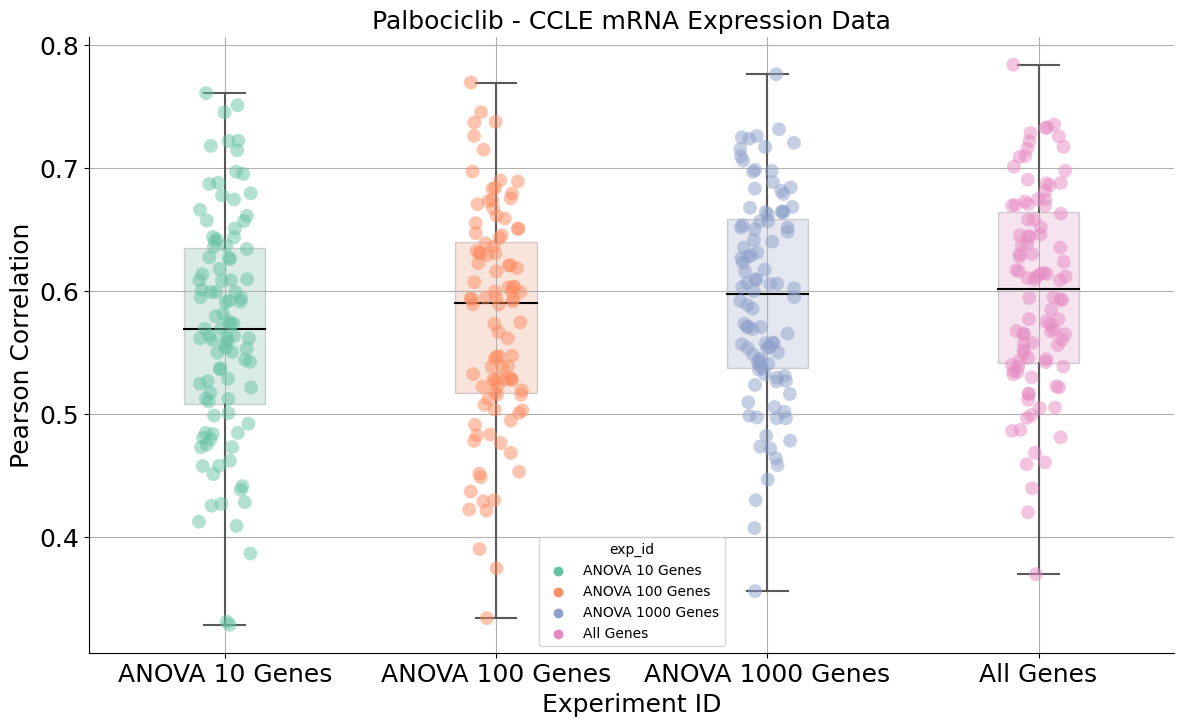

In [26]:
# plot collection df as a boxplot

import seaborn as sns
import matplotlib.pyplot as plt

import Visualisation as vis

fig, ax = plt.subplots(figsize=(14,8))
    
vis.plot_box_plot(collection_df_gene_freg, 'exp_id', 'pearson_corr', 'Palbociclib - CCLE mRNA Expression Data',
                'Experiment ID', 'Pearson Correlation', ax=ax)


plt.grid()
sns.despine()
# show the plot
plt.show()


This concludes that f-regression simply cannot outperform training using all features. 

In [27]:
# using STRING database to select the 1st,2nd and 3rd degree neighbours of the drug target

## Feature Selection using proteomic expression data from Goncalves et al.

In [28]:
import pandas as pd
import pickle

# import GDSC2 drug response data using pickle

with open('data/drug-response/GDSC2/cache_gdsc2.pkl', 'rb') as f:
    gdsc2 = pickle.load(f)
    gdsc2_info = pickle.load(f)

# import proteomic expression 
with open('data/proteomic-expression/goncalves-2022-cell/goncalve_proteome_fillna_processed.pkl', 'rb') as f:
    joined_full_protein_matrix = pickle.load(f)
    joined_sin_peptile_exclusion_matrix = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)

# open STRING to goncalves mapping file

with open('data\protein-interaction\STRING\goncalve_to_string_id_df.pkl', 'rb') as f:
    goncalve_to_string_id_df = pickle.load(f)




In [29]:
import DataFunctions as utils 

# create the full dataset

palbociclib_proteomic_df = utils.create_joint_dataset_from_proteome_gdsc('Palbociclib', 
                                                                         joined_sin_peptile_exclusion_matrix, gdsc2)

In [30]:
feature_data, label_data = utils.create_feature_and_label(palbociclib_proteomic_df)

In [31]:
feature_data.head()

,P37108;SRP14_HUMAN,Q96JP5;ZFP91_HUMAN,Q9Y4H2;IRS2_HUMAN,P36578;RL4_HUMAN,Q6SPF0;SAMD1_HUMAN,O76031;CLPX_HUMAN,Q8WUQ7;CATIN_HUMAN,A6NIH7;U119B_HUMAN,Q9BTD8;RBM42_HUMAN,Q9P258;RCC2_HUMAN,...,P33151;CADH5_HUMAN,Q5EBL4;RIPL1_HUMAN,P49715;CEBPA_HUMAN,Q5TA45;INT11_HUMAN,O14924;RGS12_HUMAN,Q7Z3B1;NEGR1_HUMAN,O60669;MOT2_HUMAN,Q13571;LAPM5_HUMAN,Q96JM2;ZN462_HUMAN,P35558;PCKGC_HUMAN
SIDM00042,5.70786,0.00000,0.0000,6.22574,0.00000,4.49579,0.0,0.00000,2.87981,0.00000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
SIDM00044,6.04591,3.69356,0.0000,7.07092,3.49594,4.05438,0.0,0.00000,3.44202,4.34237,...,0.0,3.0226,0.0,0.0,0.0,0.0,2.16952,0.0,0.0,0.0
SIDM00045,6.20582,2.88118,0.0000,8.25336,3.35439,5.09923,0.0,0.00000,3.56256,6.01081,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
SIDM00047,6.80469,2.78737,0.0000,7.58653,2.14980,5.43356,0.0,3.50808,3.43601,5.12233,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
SIDM00049,6.28591,0.00000,2.1142,6.98525,3.52912,4.74122,0.0,0.00000,3.51710,5.81359,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


In [32]:
label_data.head()

SIDM00042    5.344381
SIDM00044    2.482390
SIDM00045    0.057768
SIDM00047    2.949412
SIDM00049    3.275468
Name: LN_IC50, dtype: float64

### Selection using f-regression

c:\Github\ode-biomarker-project\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.667e-01, tolerance: 1.715e-01
  model = cd_fast.enet_coordinate_descent(


score using selected features: 1.5856, score using all features: 1.8869


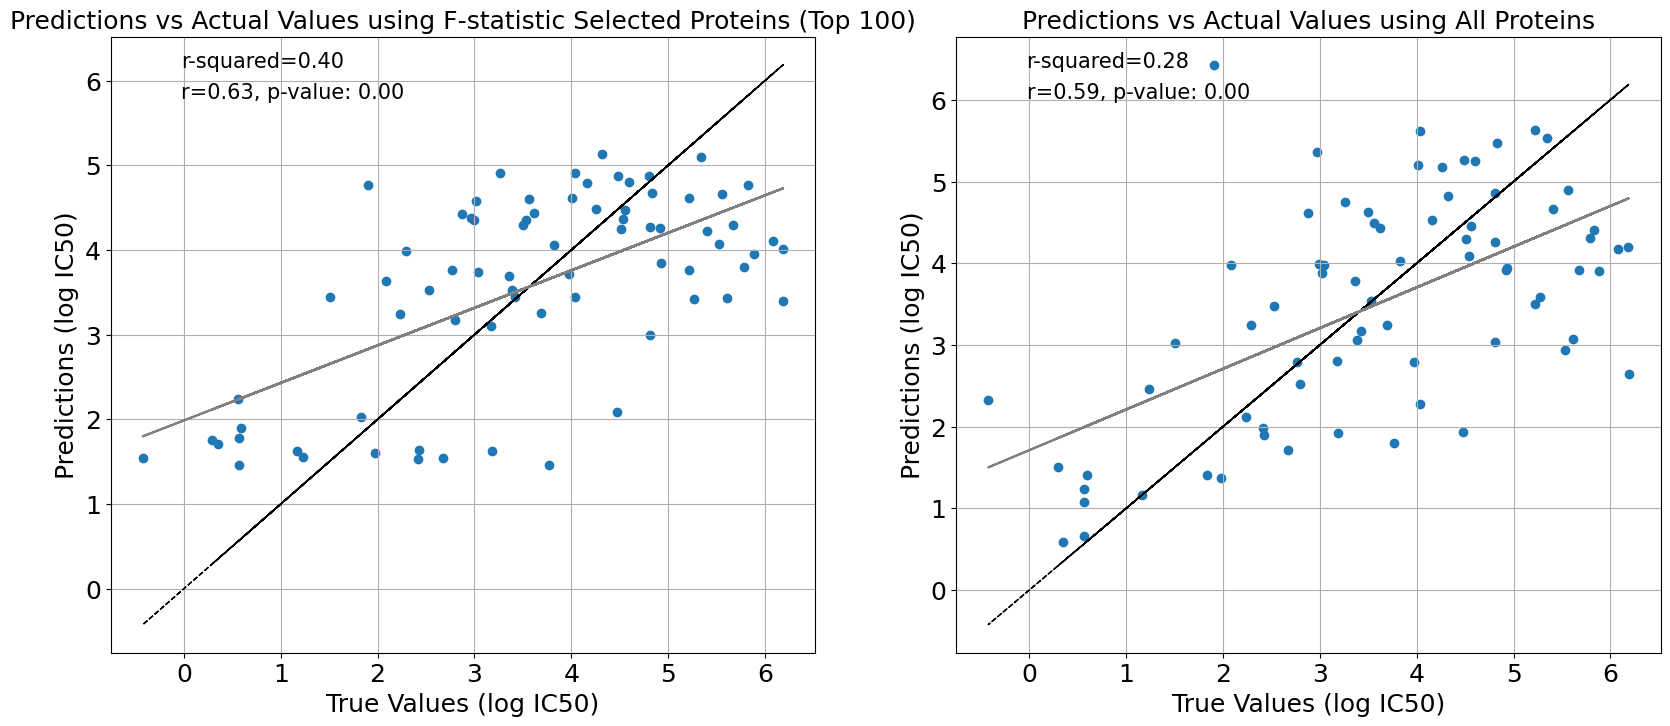

In [33]:
# split the data into train and test set

from sklearn.model_selection import train_test_split

# import lasso regression model

from sklearn.linear_model import ElasticNet, ElasticNetCV

# import feature selection

from sklearn.feature_selection import SelectKBest, f_regression


import numpy as np

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.1, 
                                                    random_state=np.random.randint(1000))

# perform feature selection on the training set

selector = SelectKBest(f_regression, k=100)
selector.fit(X_train, y_train)

# get the selected features

selected_features = X_train.columns[selector.get_support()]

# train the model on the selected features

lasso = ElasticNet(alpha=0.1)
lasso.fit(X_train[selected_features], y_train)

lasso_all_features = ElasticNet(alpha=0.1)
lasso_all_features.fit(X_train, y_train)

# get the predictions

y_pred = lasso.predict(X_test[selected_features])
predictions_all_features = lasso_all_features.predict(X_test)

# get the score

from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_test, y_pred)
score_all = mean_squared_error(y_test, predictions_all_features)

print(f'score using selected features: {score:.4f}, score using all features: {score_all:.4f}')

# plot the predictions vs the actual values

import matplotlib.pyplot as plt
import Visualisation as vis

# make a 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20,8))

# for each axis, plot the predictions vs the actual values
vis.plot_predictions_vs_actual_values(y_test, y_pred, ax=ax[0], 
                                      title='Predictions vs Actual Values using F-statistic Selected Proteins (Top 100)',
                                      x_label='True Values (log IC50)', y_label='Predictions (log IC50)',
                                      minitext_size=15)
vis.plot_predictions_vs_actual_values(y_test, predictions_all_features, ax=ax[1], 
                                      title='Predictions vs Actual Values using All Proteins',
                                      x_label='True Values (log IC50)', y_label='Predictions (log IC50)',
                                      minitext_size=15)
# show the plot
plt.show()


#### Bulk run

In [34]:
# iterate feature selection for {repeat} times 
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# import elastic net regression model and random forest regression model

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

repeats = 100
test_size = 0.1
exp_ids = ['ANOVA Proteins 10', 'ANOVA Proteins 100', 'ANOVA Proteins 1000', 'All Proteins']
feature_selection_size = [10, 100, 1000, feature_data.shape[1]]

data = []
data_column_names = ['exp_id', 'random_seed', 'score', 'y_pred', 'y_test', 'selected_features', 'pearson_corr', 'pearson_p_val', 'r_squared']

for i in range(repeats):
    random_seed = np.random.randint(1000)
    X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=test_size, 
                                                        random_state=random_seed)

    for exp_id, k in zip(exp_ids, feature_selection_size):
        selector = SelectKBest(f_regression, k=k)
        selector.fit(X_train, y_train)
        selected_features = X_train.columns[selector.get_support()].tolist()
        model = ElasticNet()
        model.fit(X_train[selected_features], y_train)
        y_pred = model.predict(X_test[selected_features])
        score = mean_squared_error(y_test, y_pred)
        corr, p_val = pearsonr(y_test, y_pred)
        r_squared = r2_score(y_test, y_pred)

        # print debug info
        print(f'iteration: {i}, score: {score:.4f}, pearson corr: {corr:.4f}, pearson p_val: {p_val:.4f}, r_squared: {r_squared:.4f}')

        row = [exp_id, random_seed, score, y_pred, y_test.tolist(), selected_features, corr, p_val, r_squared]
        data.append(row)

# save result in a dataframe
collection_df_freg_proteome = pd.DataFrame(data, columns=data_column_names)



iteration: 0, score: 1.9378, pearson corr: 0.5790, pearson p_val: 0.0000, r_squared: 0.3037
iteration: 0, score: 1.8560, pearson corr: 0.6047, pearson p_val: 0.0000, r_squared: 0.3331
iteration: 0, score: 1.7960, pearson corr: 0.6188, pearson p_val: 0.0000, r_squared: 0.3546
iteration: 0, score: 1.7166, pearson corr: 0.6483, pearson p_val: 0.0000, r_squared: 0.3831
iteration: 1, score: 1.8466, pearson corr: 0.5759, pearson p_val: 0.0000, r_squared: 0.2956
iteration: 1, score: 1.7334, pearson corr: 0.6111, pearson p_val: 0.0000, r_squared: 0.3388
iteration: 1, score: 1.6697, pearson corr: 0.6234, pearson p_val: 0.0000, r_squared: 0.3631
iteration: 1, score: 1.6302, pearson corr: 0.6384, pearson p_val: 0.0000, r_squared: 0.3781
iteration: 2, score: 1.8491, pearson corr: 0.5330, pearson p_val: 0.0000, r_squared: 0.2601
iteration: 2, score: 1.7800, pearson corr: 0.5518, pearson p_val: 0.0000, r_squared: 0.2877
iteration: 2, score: 1.6763, pearson corr: 0.5905, pearson p_val: 0.0000, r_squa

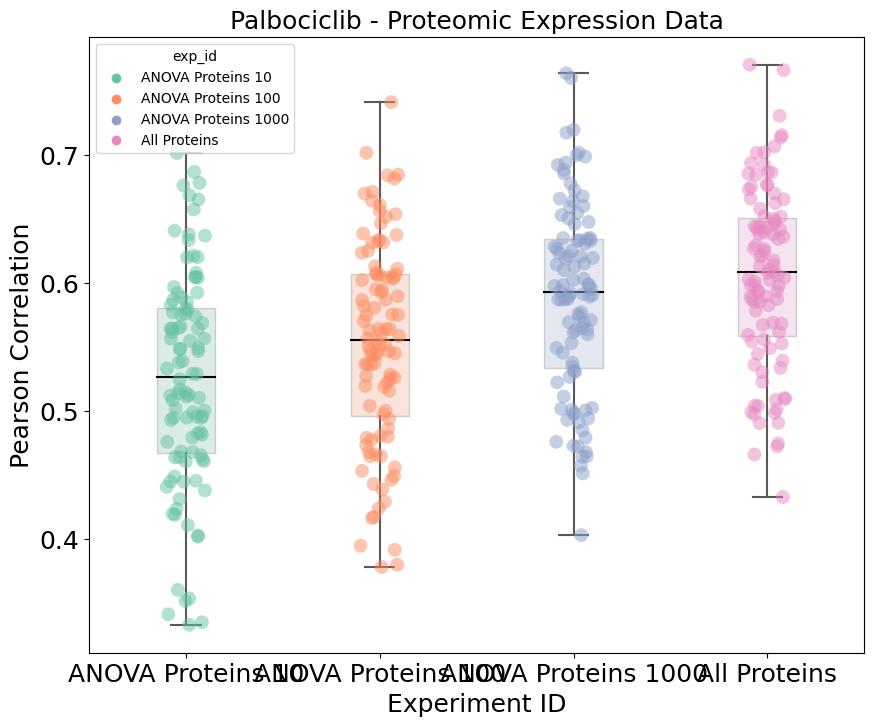

In [35]:
# plot collection df as a boxplot

import seaborn as sns
import matplotlib.pyplot as plt

import Visualisation as vis

fig, ax = plt.subplots(figsize=(10,8))
    
vis.plot_box_plot(collection_df_freg_proteome, 'exp_id', 'pearson_corr', 'Palbociclib - Proteomic Expression Data',
                'Experiment ID', 'Pearson Correlation', ax=ax)

# show the plot
plt.show()


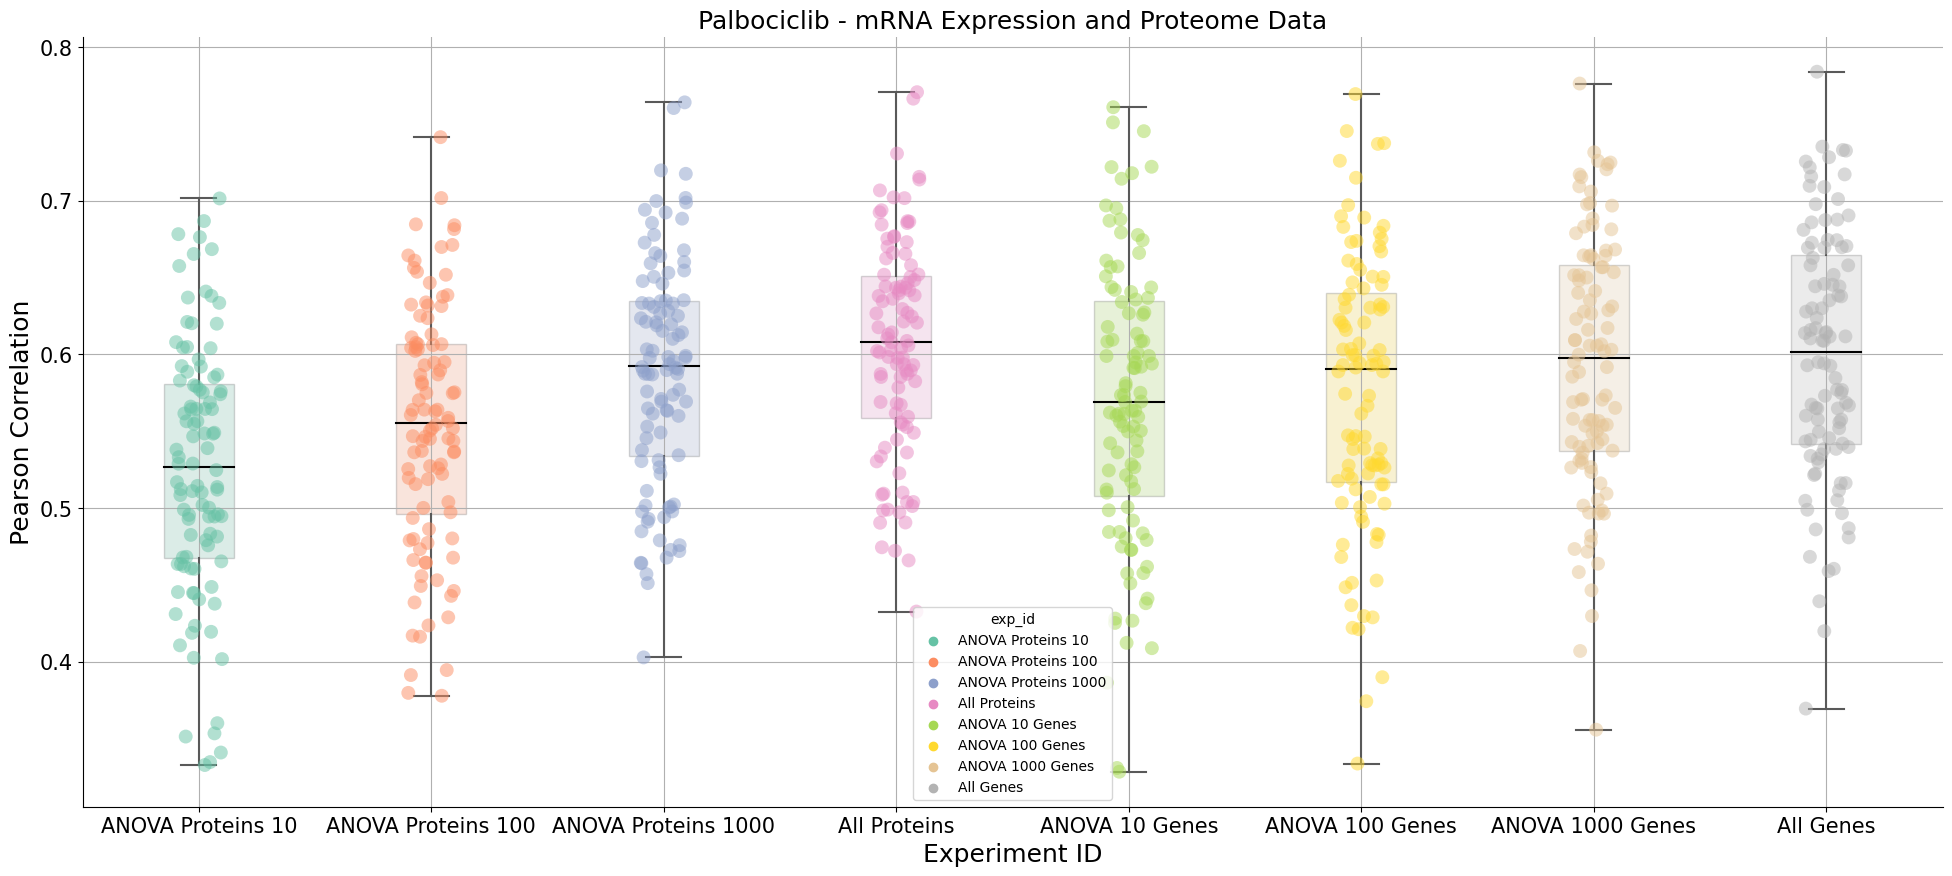

In [36]:
# combine the results from the two datasets

collection_df_freg_all = pd.concat([collection_df_freg_proteome, collection_df_gene_freg], ignore_index=True)

# plot collection df as a boxplot

fig, ax = plt.subplots(figsize=(24,10))

vis.plot_box_plot(collection_df_freg_all, 'exp_id', 'pearson_corr', 'Palbociclib - mRNA Expression and Proteome Data',
                'Experiment ID', 'Pearson Correlation', ax=ax, tick_fontsize=15)          

sns.despine()
plt.grid()
# show the plot
plt.show()

In [37]:
# obtain mean and 1st and 3rd quartile for each experiment

mean_quartile_df = collection_df_freg_all.groupby('exp_id')['pearson_corr'].describe()[['mean', '25%', '75%']]

# print the mean and 1st and 3rd quartile for each experiment

print(mean_quartile_df)

                         mean       25%       75%
exp_id                                           
ANOVA 10 Genes       0.568032  0.507553  0.634435
ANOVA 100 Genes      0.575007  0.517011  0.639763
ANOVA 1000 Genes     0.593119  0.536936  0.658005
ANOVA Proteins 10    0.524744  0.467118  0.580589
ANOVA Proteins 100   0.552709  0.496217  0.606556
ANOVA Proteins 1000  0.588571  0.533507  0.634672
All Genes            0.598732  0.541313  0.664371
All Proteins         0.605469  0.558404  0.650681


### Selection using STRING

#### Generating Interaction Partners

In [38]:
# using STRING database to select the 1st,2nd and 3rd degree neighbours of the drug target
import pickle 
import pandas as pd

with open('data/protein-interaction/STRING/palbociclib_nth_degree_neighbours.pkl', 'rb') as f:
    nth_degree_neighbours = pickle.load(f)

drug_targets = nth_degree_neighbours[0]
first_degree_neighbours = nth_degree_neighbours[1]
second_degree_neighbours = nth_degree_neighbours[2]
third_degree_neighbours = nth_degree_neighbours[3]

In [39]:
# select features from the first degree neighbours

feature_data_first_degree = feature_data[first_degree_neighbours]

feature_data_first_degree.head()

,P50750;CDK9_HUMAN,Q14186;TFDP1_HUMAN,P04637;P53_HUMAN,P51946;CCNH_HUMAN,P50613;CDK7_HUMAN,O95067;CCNB2_HUMAN,P20248;CCNA2_HUMAN,Q13309;SKP2_HUMAN,P16989;YBOX3_HUMAN,O75832;PSD10_HUMAN,...,Q9P2W1;HOP2_HUMAN,P51948;MAT1_HUMAN,P12931;SRC_HUMAN,P07900;HS90A_HUMAN,P12004;PCNA_HUMAN,P42771;CDN2A_HUMAN,P24385;CCND1_HUMAN,P07948;LYN_HUMAN,P31947;1433S_HUMAN,P49918;CDN1C_HUMAN
SIDM00042,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,2.56338,0.00000,...,0.0,0.00000,0.00000,5.77254,5.02710,0.0,0.0,0.00000,7.33660,0.0
SIDM00044,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,4.23056,2.76831,...,0.0,0.00000,0.00000,9.78612,7.77206,0.0,0.0,3.14498,9.81594,0.0
SIDM00045,2.54225,0.0,3.68677,0.0,0.0,0.0,2.67813,0.0,5.07592,2.57275,...,0.0,1.36169,2.75757,9.73268,8.05159,0.0,0.0,2.52465,9.62882,0.0
SIDM00047,2.08931,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,5.09561,0.00000,...,0.0,0.00000,2.20435,8.56821,7.31040,0.0,0.0,3.50726,9.74553,0.0
SIDM00049,0.00000,0.0,1.85910,0.0,0.0,0.0,0.00000,0.0,3.37366,0.00000,...,0.0,0.00000,2.69990,9.63436,8.30676,0.0,0.0,3.05039,10.61189,0.0


score using selected features: 1.3270


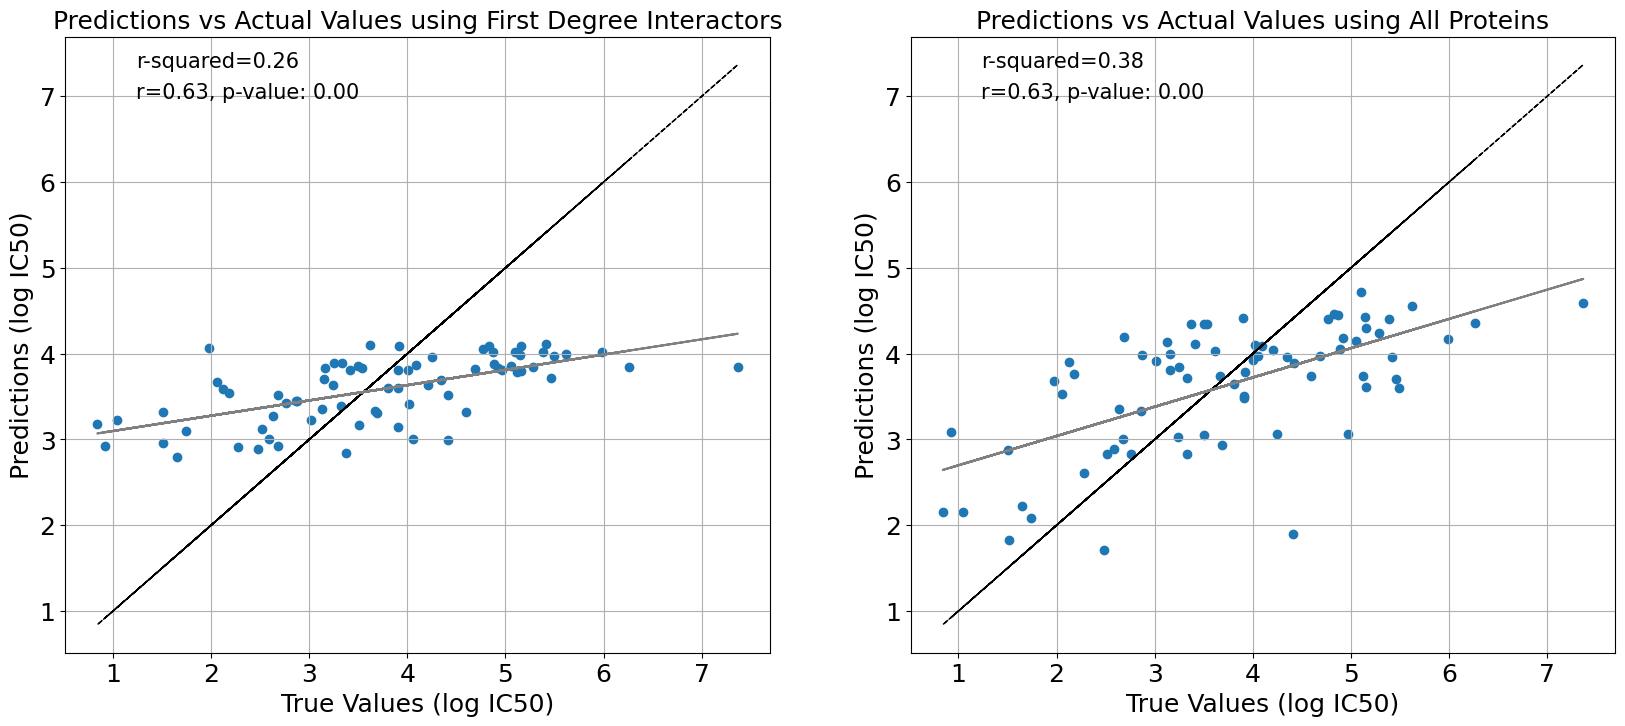

In [40]:
# split the data into train and test set

from sklearn.model_selection import train_test_split

# import lasso regression model

from sklearn.linear_model import ElasticNet

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.1,
                                                    random_state=np.random.randint(1000))

# train the model 

# perform feature selection on the training set, using n degree interactors

n_degree_neighbours = first_degree_neighbours 

X_train_first_degree = X_train[n_degree_neighbours]

# train the model on the selected features

lasso = ElasticNet()
lasso.fit(X_train_first_degree, y_train)

lasso_all_features = ElasticNet()
lasso_all_features.fit(X_train, y_train)



# get the predictions

y_pred = lasso.predict(X_test[n_degree_neighbours])
predictions_all_features = lasso_all_features.predict(X_test)

# get the score

from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_test, y_pred)

print(f'score using selected features: {score:.4f}')

# plot the predictions vs the actual values

import matplotlib.pyplot as plt
import Visualisation as vis

# make a 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20,8))

# for each axis, plot the predictions vs the actual values
vis.plot_predictions_vs_actual_values(y_test, y_pred, ax=ax[0],
                                        title='Predictions vs Actual Values using First Degree Interactors',
                                        x_label='True Values (log IC50)', y_label='Predictions (log IC50)',
                                        minitext_size=15)
vis.plot_predictions_vs_actual_values(y_test, predictions_all_features, ax=ax[1],
                                        title='Predictions vs Actual Values using All Proteins',            
                                        x_label='True Values (log IC50)', y_label='Predictions (log IC50)',
                                        minitext_size=15)

# show the plot
plt.show()

#### Bulk run

In [41]:
# iterate feature selection for {repeat} times
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# import elastic net regression model and random forest regression model

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

run_code_block = True

if run_code_block:

    repeats = 100
    test_size = 0.1
    exp_ids = ['First Degree', 'Second Degree', 'Third Degree']
    interactor_degrees = [first_degree_neighbours, second_degree_neighbours, third_degree_neighbours]

    data = []
    data_column_names = ['exp_id', 'random_seed', 'score', 'y_pred', 'y_test',
                         'selected_features', 'pearson_corr', 'pearson_p_val', 'r_squared']

    for i in range(repeats):
        random_seed = np.random.randint(1000)
        X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=test_size,
                                                            random_state=random_seed)

        for exp_id, n_degree_neighbours in zip(exp_ids, interactor_degrees):

            model = ElasticNet()
            model.fit(X_train[n_degree_neighbours], y_train)
            y_pred = model.predict(X_test[n_degree_neighbours])
            score = mean_squared_error(y_test, y_pred)
            corr, p_val = pearsonr(y_test, y_pred)
            r_squared = r2_score(y_test, y_pred)

            # print debug info
            print(
                f'iteration: {i}, score: {score:.4f}, pearson corr: {corr:.4f}, pearson p_val: {p_val:.4f}, r_squared: {r_squared:.4f}')

            row = [exp_id, random_seed, score, y_pred,
                   y_test.tolist(), n_degree_neighbours, corr, p_val, r_squared]
            data.append(row)

    # save result in a dataframe
    collection_df_string = pd.DataFrame(data, columns=data_column_names)

    # save the dataframe to a pickle file
    with open('data/processed-results/elastic_net_string_results_proteome_palbociclib.pkl', 'wb') as f:
        pickle.dump(collection_df_string, f)


iteration: 0, score: 2.1474, pearson corr: 0.4457, pearson p_val: 0.0001, r_squared: 0.1471
iteration: 0, score: 1.5325, pearson corr: 0.6944, pearson p_val: 0.0000, r_squared: 0.3914
iteration: 0, score: 1.5638, pearson corr: 0.6456, pearson p_val: 0.0000, r_squared: 0.3789
iteration: 1, score: 2.4452, pearson corr: 0.3732, pearson p_val: 0.0011, r_squared: 0.1063
iteration: 1, score: 2.0443, pearson corr: 0.5213, pearson p_val: 0.0000, r_squared: 0.2529
iteration: 1, score: 1.8707, pearson corr: 0.5780, pearson p_val: 0.0000, r_squared: 0.3163
iteration: 2, score: 2.0387, pearson corr: 0.6206, pearson p_val: 0.0000, r_squared: 0.1951
iteration: 2, score: 1.5404, pearson corr: 0.6560, pearson p_val: 0.0000, r_squared: 0.3918
iteration: 2, score: 1.5294, pearson corr: 0.6626, pearson p_val: 0.0000, r_squared: 0.3962
iteration: 3, score: 2.6529, pearson corr: 0.4820, pearson p_val: 0.0000, r_squared: 0.1553
iteration: 3, score: 2.1612, pearson corr: 0.5937, pearson p_val: 0.0000, r_squa

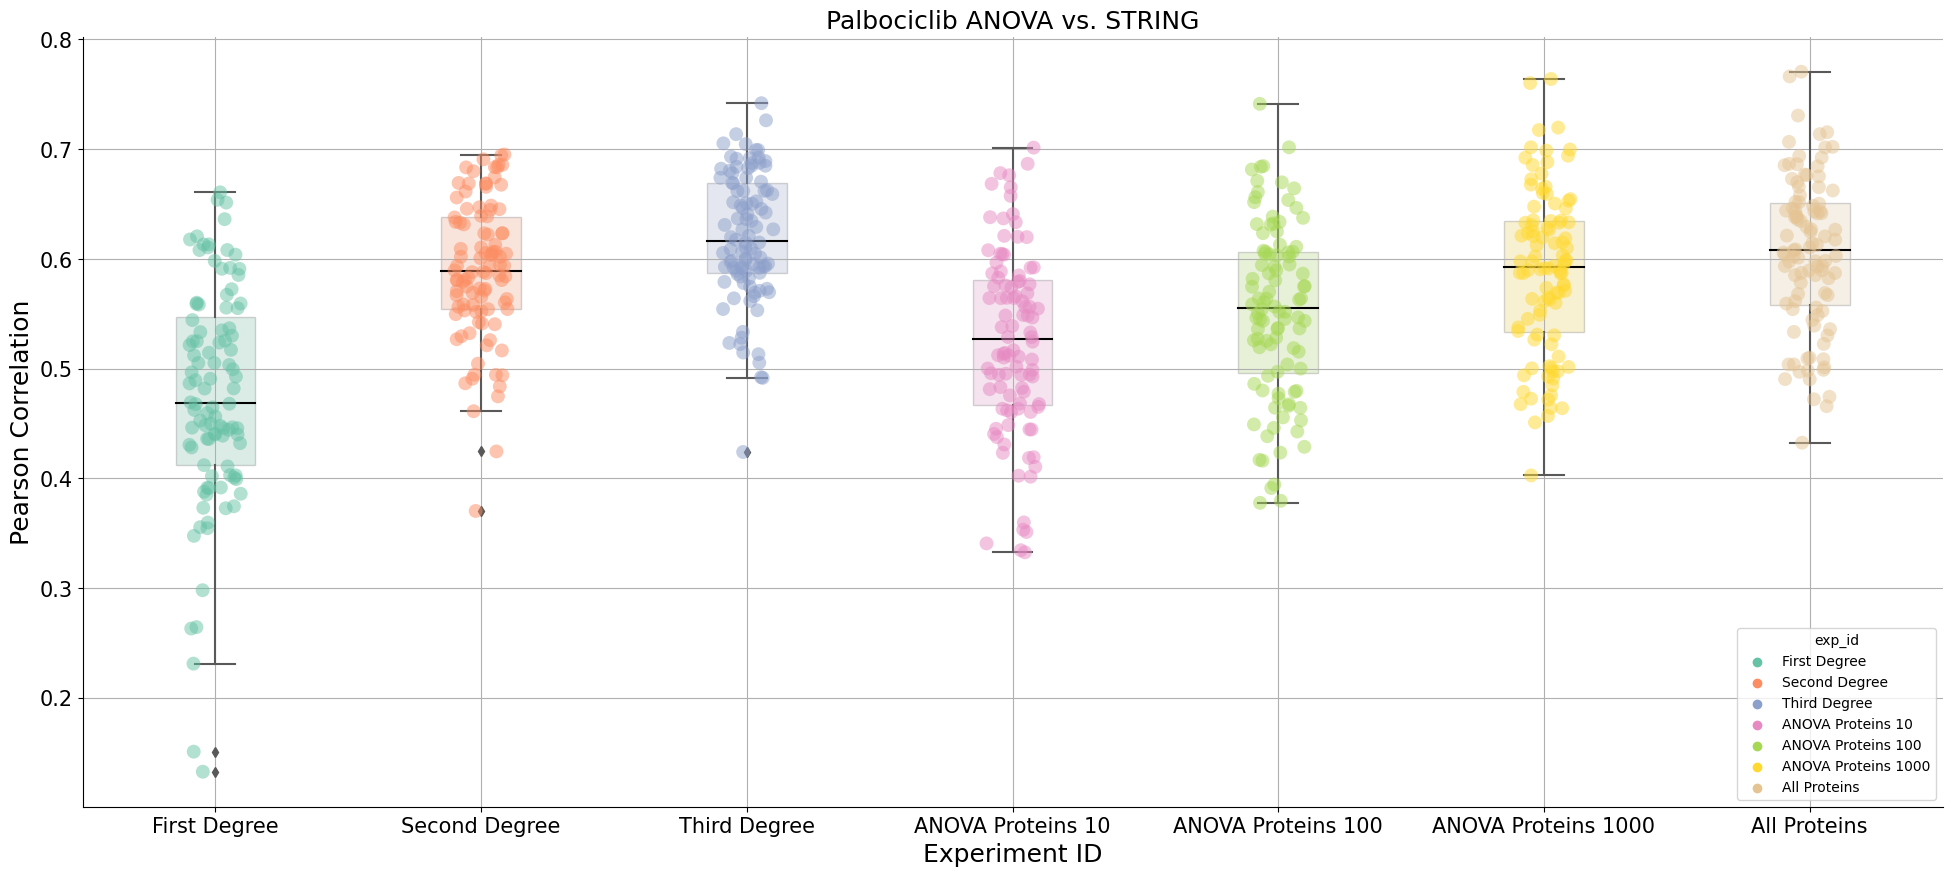

In [42]:
# combine the results from the two datasets

collection_df_proteome_interaction = pd.concat([collection_df_string, collection_df_freg_proteome], ignore_index=True)

# plot collection df as a boxplot

fig, ax = plt.subplots(figsize=(24,10))

vis.plot_box_plot(collection_df_proteome_interaction, 'exp_id', 'pearson_corr', 'Palbociclib ANOVA vs. STRING',
                'Experiment ID', 'Pearson Correlation', ax=ax, tick_fontsize=15)          

sns.despine()
plt.grid()
# show the plot
plt.show()

In [43]:
# obtain mean and 1st and 3rd quartile for each experiment

mean_quartile_df = collection_df_proteome_interaction.groupby('exp_id')['pearson_corr'].describe()[['mean', '25%', '75%']]

# print the mean and 1st and 3rd quartile for each experiment

print(mean_quartile_df)

                         mean       25%       75%
exp_id                                           
ANOVA Proteins 10    0.524744  0.467118  0.580589
ANOVA Proteins 100   0.552709  0.496217  0.606556
ANOVA Proteins 1000  0.588571  0.533507  0.634672
All Proteins         0.605469  0.558404  0.650681
First Degree         0.474607  0.411762  0.547000
Second Degree        0.590040  0.554290  0.638071
Third Degree         0.619648  0.587082  0.669024


### Selection using random protein sets

score using selected features: 1.5128, score using all features: 1.4826


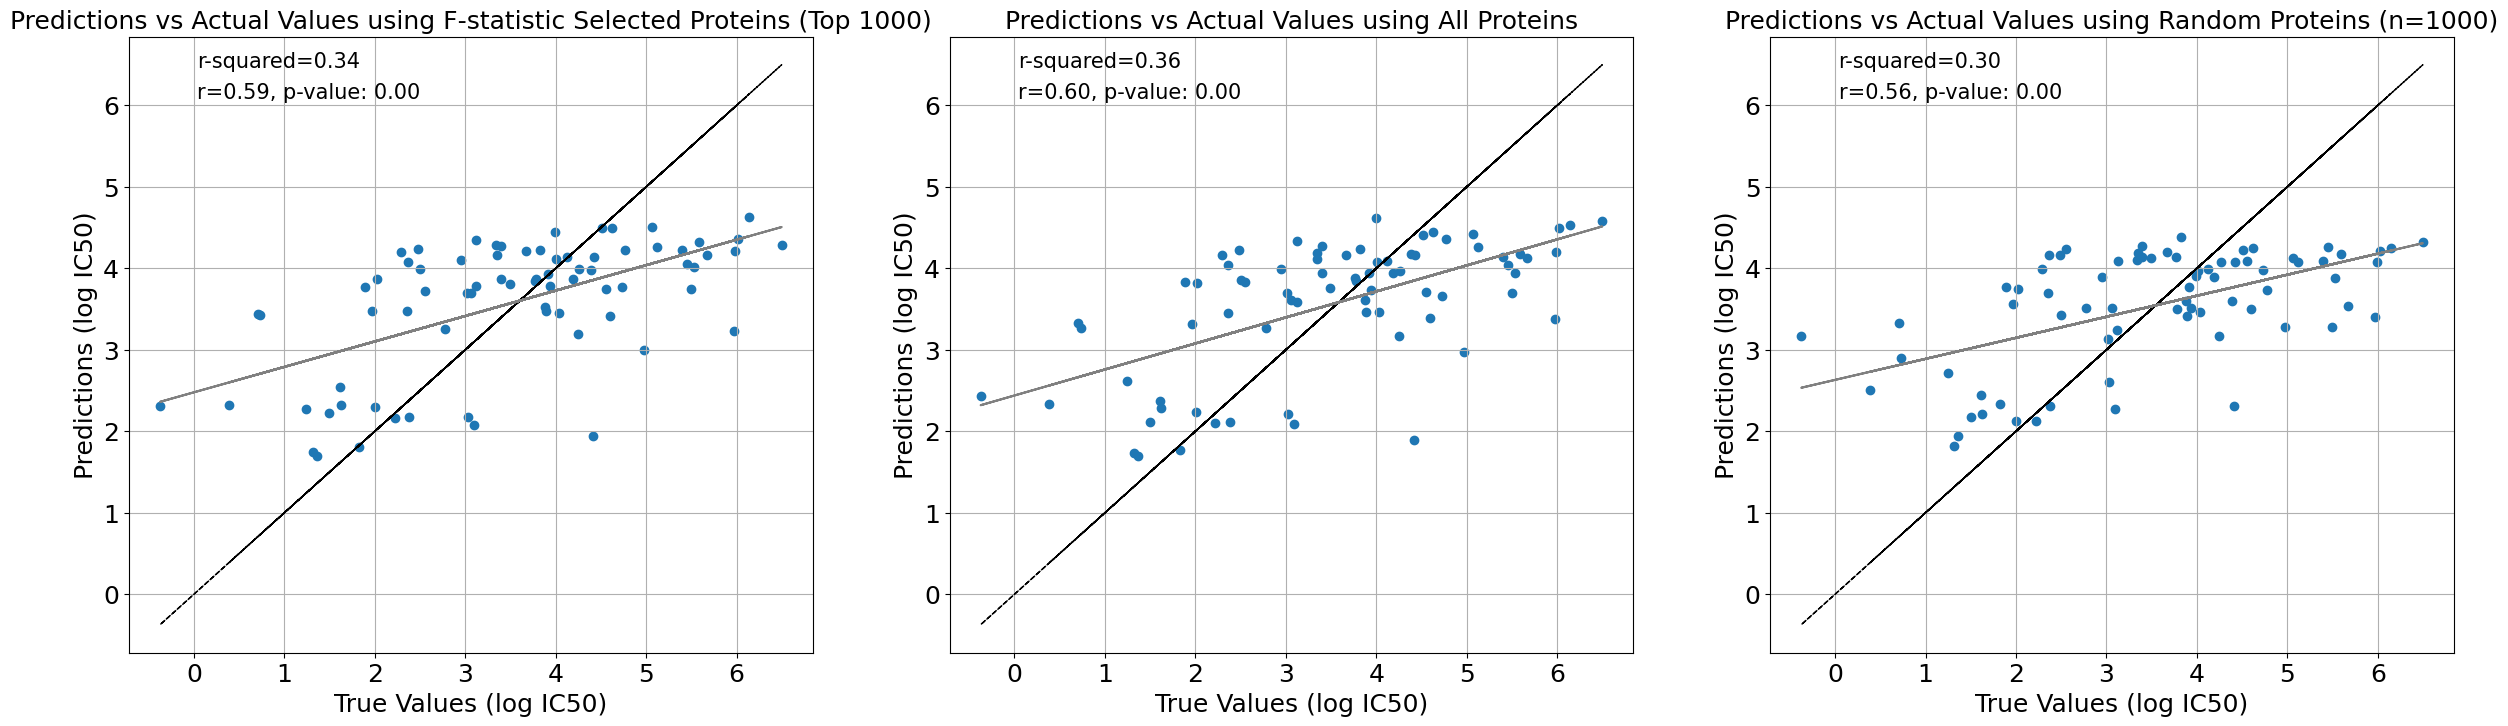

In [44]:
# split the data into train and test set

import Visualisation as vis
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# import lasso regression model

from sklearn.linear_model import ElasticNet, ElasticNetCV

# import xgboost model

from xgboost import XGBRegressor

# import feature selection

from sklearn.feature_selection import SelectKBest, f_regression


import numpy as np

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.1,
                                                    random_state=np.random.randint(1000))

# perform feature selection on the training set

n = 1000

selector = SelectKBest(f_regression, k=n)
selector.fit(X_train, y_train)

# get the selected features

selected_features = X_train.columns[selector.get_support()]
random_features = X_train.columns[np.random.choice(X_train.shape[1], n, replace=False)]

# train the model on the selected features

lasso = ElasticNet()
lasso.fit(X_train[selected_features], y_train)

lasso_all_features = ElasticNet()
lasso_all_features.fit(X_train, y_train)

model_random = ElasticNet()
model_random.fit(X_train[random_features], y_train)

# get the predictions

y_pred = lasso.predict(X_test[selected_features])
predictions_all_features = lasso_all_features.predict(X_test)
predictions_random_features = model_random.predict(X_test[random_features])

# get the score


score = mean_squared_error(y_test, y_pred)
score_all = mean_squared_error(y_test, predictions_all_features)

print(
    f'score using selected features: {score:.4f}, score using all features: {score_all:.4f}')

# plot the predictions vs the actual values


# make a 1x2 subplots
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

# for each axis, plot the predictions vs the actual values
vis.plot_predictions_vs_actual_values(y_test, y_pred, ax=ax[0],
                                      title=f'Predictions vs Actual Values using F-statistic Selected Proteins (Top {n})',
                                      x_label='True Values (log IC50)', y_label='Predictions (log IC50)',
                                      minitext_size=15)
vis.plot_predictions_vs_actual_values(y_test, predictions_all_features, ax=ax[1],
                                      title='Predictions vs Actual Values using All Proteins',
                                      x_label='True Values (log IC50)', y_label='Predictions (log IC50)',
                                      minitext_size=15)

vis.plot_predictions_vs_actual_values(y_test, predictions_random_features, ax=ax[2],
                                        title=f'Predictions vs Actual Values using Random Proteins (n={n})',
                                        x_label='True Values (log IC50)', y_label='Predictions (log IC50)',
                                        minitext_size=15)
# show the plot
plt.show()


#### Bulk run

In [45]:
# iterate feature selection for {repeat} times 
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# import elastic net regression model and random forest regression model

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

repeats = 100
test_size = 0.1
exp_ids = ['Random Proteins 10', 'Random Proteins 100', 'Random Proteins 1000']
feature_selection_size = [10, 100, 1000, feature_data.shape[1]]

data = []
data_column_names = ['exp_id', 'random_seed', 'score', 'y_pred', 'y_test', 'selected_features', 'pearson_corr', 'pearson_p_val', 'r_squared']

for i in range(repeats):
    random_seed = np.random.randint(1000)
    X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=test_size, 
                                                        random_state=random_seed)

    for exp_id, k in zip(exp_ids, feature_selection_size):
        selected_features = X_train.columns[np.random.choice(X_train.shape[1], k, replace=False)]
        model = ElasticNet()
        model.fit(X_train[selected_features], y_train)
        y_pred = model.predict(X_test[selected_features])
        score = mean_squared_error(y_test, y_pred)
        corr, p_val = pearsonr(y_test, y_pred)
        r_squared = r2_score(y_test, y_pred)

        # print debug info
        print(f'iteration: {i}, score: {score:.4f}, pearson corr: {corr:.4f}, pearson p_val: {p_val:.4f}, r_squared: {r_squared:.4f}')

        row = [exp_id, random_seed, score, y_pred, y_test.tolist(), selected_features, corr, p_val, r_squared]
        data.append(row)

# save result in a dataframe
collection_df_random_proteome = pd.DataFrame(data, columns=data_column_names)



c:\Github\ode-biomarker-project\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


iteration: 0, score: 2.1624, pearson corr: nan, pearson p_val: nan, r_squared: -0.0059
iteration: 0, score: 1.7901, pearson corr: 0.4938, pearson p_val: 0.0000, r_squared: 0.1673
iteration: 0, score: 1.4557, pearson corr: 0.5771, pearson p_val: 0.0000, r_squared: 0.3228
iteration: 1, score: 2.3550, pearson corr: 0.0509, pearson p_val: 0.6669, r_squared: -0.1415
iteration: 1, score: 1.9977, pearson corr: 0.4010, pearson p_val: 0.0004, r_squared: 0.0317
iteration: 1, score: 1.9008, pearson corr: 0.4442, pearson p_val: 0.0001, r_squared: 0.0787
iteration: 2, score: 2.6585, pearson corr: 0.4202, pearson p_val: 0.0002, r_squared: 0.0508
iteration: 2, score: 2.4158, pearson corr: 0.3817, pearson p_val: 0.0008, r_squared: 0.1375
iteration: 2, score: 2.1317, pearson corr: 0.4966, pearson p_val: 0.0000, r_squared: 0.2389
iteration: 3, score: 2.7930, pearson corr: 0.2680, pearson p_val: 0.0209, r_squared: 0.0108
iteration: 3, score: 2.2169, pearson corr: 0.5388, pearson p_val: 0.0000, r_squared:

c:\Github\ode-biomarker-project\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


iteration: 11, score: 1.4655, pearson corr: 0.4028, pearson p_val: 0.0004, r_squared: 0.1461
iteration: 12, score: 2.7976, pearson corr: 0.0276, pearson p_val: 0.8152, r_squared: -0.0139
iteration: 12, score: 2.2158, pearson corr: 0.5118, pearson p_val: 0.0000, r_squared: 0.1970
iteration: 12, score: 2.1239, pearson corr: 0.5115, pearson p_val: 0.0000, r_squared: 0.2303
iteration: 13, score: 3.5651, pearson corr: 0.3490, pearson p_val: 0.0023, r_squared: 0.0497
iteration: 13, score: 3.1247, pearson corr: 0.5086, pearson p_val: 0.0000, r_squared: 0.1671
iteration: 13, score: 2.3422, pearson corr: 0.6974, pearson p_val: 0.0000, r_squared: 0.3757
iteration: 14, score: 2.1244, pearson corr: 0.3167, pearson p_val: 0.0060, r_squared: 0.0136
iteration: 14, score: 1.6892, pearson corr: 0.4786, pearson p_val: 0.0000, r_squared: 0.2156
iteration: 14, score: 1.8388, pearson corr: 0.3995, pearson p_val: 0.0004, r_squared: 0.1462
iteration: 15, score: 3.0727, pearson corr: 0.1064, pearson p_val: 0.

c:\Github\ode-biomarker-project\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


iteration: 24, score: 2.8537, pearson corr: nan, pearson p_val: nan, r_squared: -0.0001
iteration: 24, score: 2.1838, pearson corr: 0.5559, pearson p_val: 0.0000, r_squared: 0.2347
iteration: 24, score: 1.8479, pearson corr: 0.6732, pearson p_val: 0.0000, r_squared: 0.3524
iteration: 25, score: 2.2201, pearson corr: 0.5112, pearson p_val: 0.0000, r_squared: 0.0348
iteration: 25, score: 1.8819, pearson corr: 0.4587, pearson p_val: 0.0000, r_squared: 0.1819
iteration: 25, score: 1.7579, pearson corr: 0.5036, pearson p_val: 0.0000, r_squared: 0.2358
iteration: 26, score: 2.7460, pearson corr: 0.2821, pearson p_val: 0.0149, r_squared: 0.0328
iteration: 26, score: 2.4349, pearson corr: 0.4132, pearson p_val: 0.0003, r_squared: 0.1424
iteration: 26, score: 2.1796, pearson corr: 0.5111, pearson p_val: 0.0000, r_squared: 0.2323
iteration: 27, score: 1.6914, pearson corr: 0.2827, pearson p_val: 0.0147, r_squared: 0.0604
iteration: 27, score: 1.5393, pearson corr: 0.3987, pearson p_val: 0.0004, 

c:\Github\ode-biomarker-project\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


iteration: 33, score: 2.4416, pearson corr: nan, pearson p_val: nan, r_squared: -0.0218
iteration: 33, score: 2.1375, pearson corr: 0.4219, pearson p_val: 0.0002, r_squared: 0.1055
iteration: 33, score: 1.8953, pearson corr: 0.4872, pearson p_val: 0.0000, r_squared: 0.2068
iteration: 34, score: 2.8180, pearson corr: 0.3562, pearson p_val: 0.0018, r_squared: 0.0907
iteration: 34, score: 2.2506, pearson corr: 0.5656, pearson p_val: 0.0000, r_squared: 0.2738
iteration: 34, score: 2.4533, pearson corr: 0.4654, pearson p_val: 0.0000, r_squared: 0.2084
iteration: 35, score: 2.9562, pearson corr: 0.3888, pearson p_val: 0.0006, r_squared: 0.0571
iteration: 35, score: 2.1523, pearson corr: 0.6648, pearson p_val: 0.0000, r_squared: 0.3135
iteration: 35, score: 2.1121, pearson corr: 0.6464, pearson p_val: 0.0000, r_squared: 0.3263
iteration: 36, score: 1.9408, pearson corr: 0.1241, pearson p_val: 0.2922, r_squared: 0.0026
iteration: 36, score: 1.7622, pearson corr: 0.3425, pearson p_val: 0.0028, 

c:\Github\ode-biomarker-project\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


iteration: 57, score: 2.4164, pearson corr: nan, pearson p_val: nan, r_squared: -0.0019
iteration: 57, score: 1.8576, pearson corr: 0.4967, pearson p_val: 0.0000, r_squared: 0.2298
iteration: 57, score: 1.8910, pearson corr: 0.4822, pearson p_val: 0.0000, r_squared: 0.2159
iteration: 58, score: 2.4780, pearson corr: 0.3360, pearson p_val: 0.0034, r_squared: 0.0454
iteration: 58, score: 2.1255, pearson corr: 0.5013, pearson p_val: 0.0000, r_squared: 0.1812
iteration: 58, score: 2.0249, pearson corr: 0.4742, pearson p_val: 0.0000, r_squared: 0.2199
iteration: 59, score: 2.6647, pearson corr: 0.2392, pearson p_val: 0.0402, r_squared: 0.0150
iteration: 59, score: 2.3390, pearson corr: 0.4467, pearson p_val: 0.0001, r_squared: 0.1354
iteration: 59, score: 1.8543, pearson corr: 0.5916, pearson p_val: 0.0000, r_squared: 0.3146
iteration: 60, score: 2.3671, pearson corr: 0.1918, pearson p_val: 0.1015, r_squared: -0.0219
iteration: 60, score: 1.9113, pearson corr: 0.5066, pearson p_val: 0.0000,

c:\Github\ode-biomarker-project\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


iteration: 82, score: 4.0406, pearson corr: nan, pearson p_val: nan, r_squared: -0.1021
iteration: 82, score: 3.0127, pearson corr: 0.5989, pearson p_val: 0.0000, r_squared: 0.1782
iteration: 82, score: 2.6918, pearson corr: 0.6753, pearson p_val: 0.0000, r_squared: 0.2658
iteration: 83, score: 2.4177, pearson corr: 0.3356, pearson p_val: 0.0035, r_squared: 0.0755
iteration: 83, score: 2.0968, pearson corr: 0.5113, pearson p_val: 0.0000, r_squared: 0.1982
iteration: 83, score: 1.7359, pearson corr: 0.6215, pearson p_val: 0.0000, r_squared: 0.3362
iteration: 84, score: 2.3023, pearson corr: 0.3767, pearson p_val: 0.0009, r_squared: 0.1027
iteration: 84, score: 1.9990, pearson corr: 0.5501, pearson p_val: 0.0000, r_squared: 0.2209
iteration: 84, score: 1.8634, pearson corr: 0.5613, pearson p_val: 0.0000, r_squared: 0.2738
iteration: 85, score: 2.4483, pearson corr: 0.3569, pearson p_val: 0.0018, r_squared: 0.0222
iteration: 85, score: 2.1549, pearson corr: 0.4339, pearson p_val: 0.0001, 

c:\Github\ode-biomarker-project\venv\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


#### Visualization

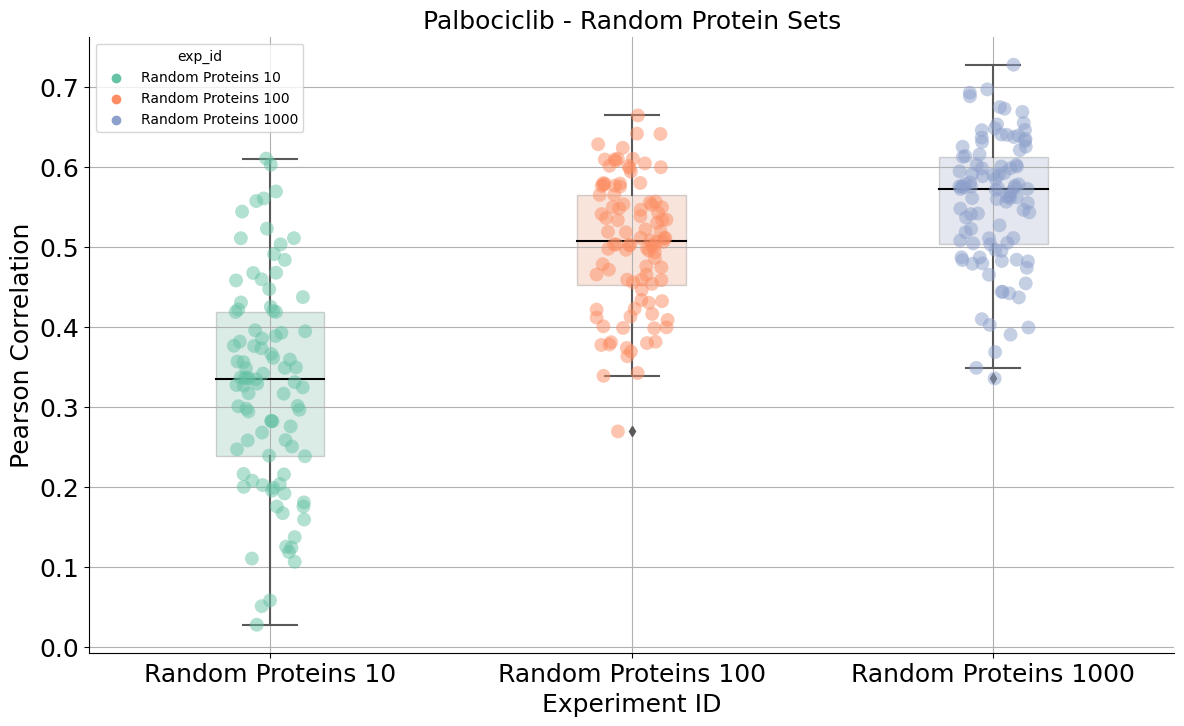

In [46]:
# plot collection df as a boxplot

import seaborn as sns
import matplotlib.pyplot as plt

import Visualisation as vis

fig, ax = plt.subplots(figsize=(14, 8))

vis.plot_box_plot(collection_df_random_proteome, 'exp_id', 'pearson_corr', 'Palbociclib - Random Protein Sets',
                  'Experiment ID', 'Pearson Correlation', ax=ax)


plt.grid()
sns.despine()
# show the plot
plt.show()


In [47]:

# combine above df with random df using pd.concat 

collection_df_random_proteome_combined = pd.concat([collection_df_freg_proteome, collection_df_random_proteome], ignore_index=True)

In [48]:
collection_df_random_proteome_combined.head()

,exp_id,random_seed,score,y_pred,y_test,selected_features,pearson_corr,pearson_p_val,r_squared
0,ANOVA Proteins 10,487,1.937815,"[3.956792872099492, 2.283730127322882, 2.50025...","[3.397201, 0.568013, 1.623789, 4.428293, 3.060...","[O60716;CTND1_HUMAN, Q13422;IKZF1_HUMAN, P4276...",0.579049,6.496347e-08,0.303660
1,ANOVA Proteins 100,487,1.855958,"[4.269239944549055, 2.530036816325812, 2.03458...","[3.397201, 0.568013, 1.623789, 4.428293, 3.060...","[P35221;CTNA1_HUMAN, Q15149;PLEC_HUMAN, O60716...",0.604677,1.160985e-08,0.333074
2,ANOVA Proteins 1000,487,1.796029,"[4.216816699520861, 2.2688451858423444, 1.9371...","[3.397201, 0.568013, 1.623789, 4.428293, 3.060...","[P36578;RL4_HUMAN, Q9P258;RCC2_HUMAN, P35221;C...",0.618801,4.203625e-09,0.354609
3,All Proteins,487,1.716625,"[4.234168672573383, 2.187967223775452, 1.92069...","[3.397201, 0.568013, 1.623789, 4.428293, 3.060...","[P37108;SRP14_HUMAN, Q96JP5;ZFP91_HUMAN, Q9Y4H...",0.648332,4.232433e-10,0.383143
4,ANOVA Proteins 10,317,1.846610,"[3.5255743367633317, 4.002278628217688, 2.8853...","[3.843971, 6.176276, 1.976144, 5.470149, 3.275...","[O60716;CTND1_HUMAN, Q13422;IKZF1_HUMAN, P4276...",0.575864,7.964979e-08,0.295591


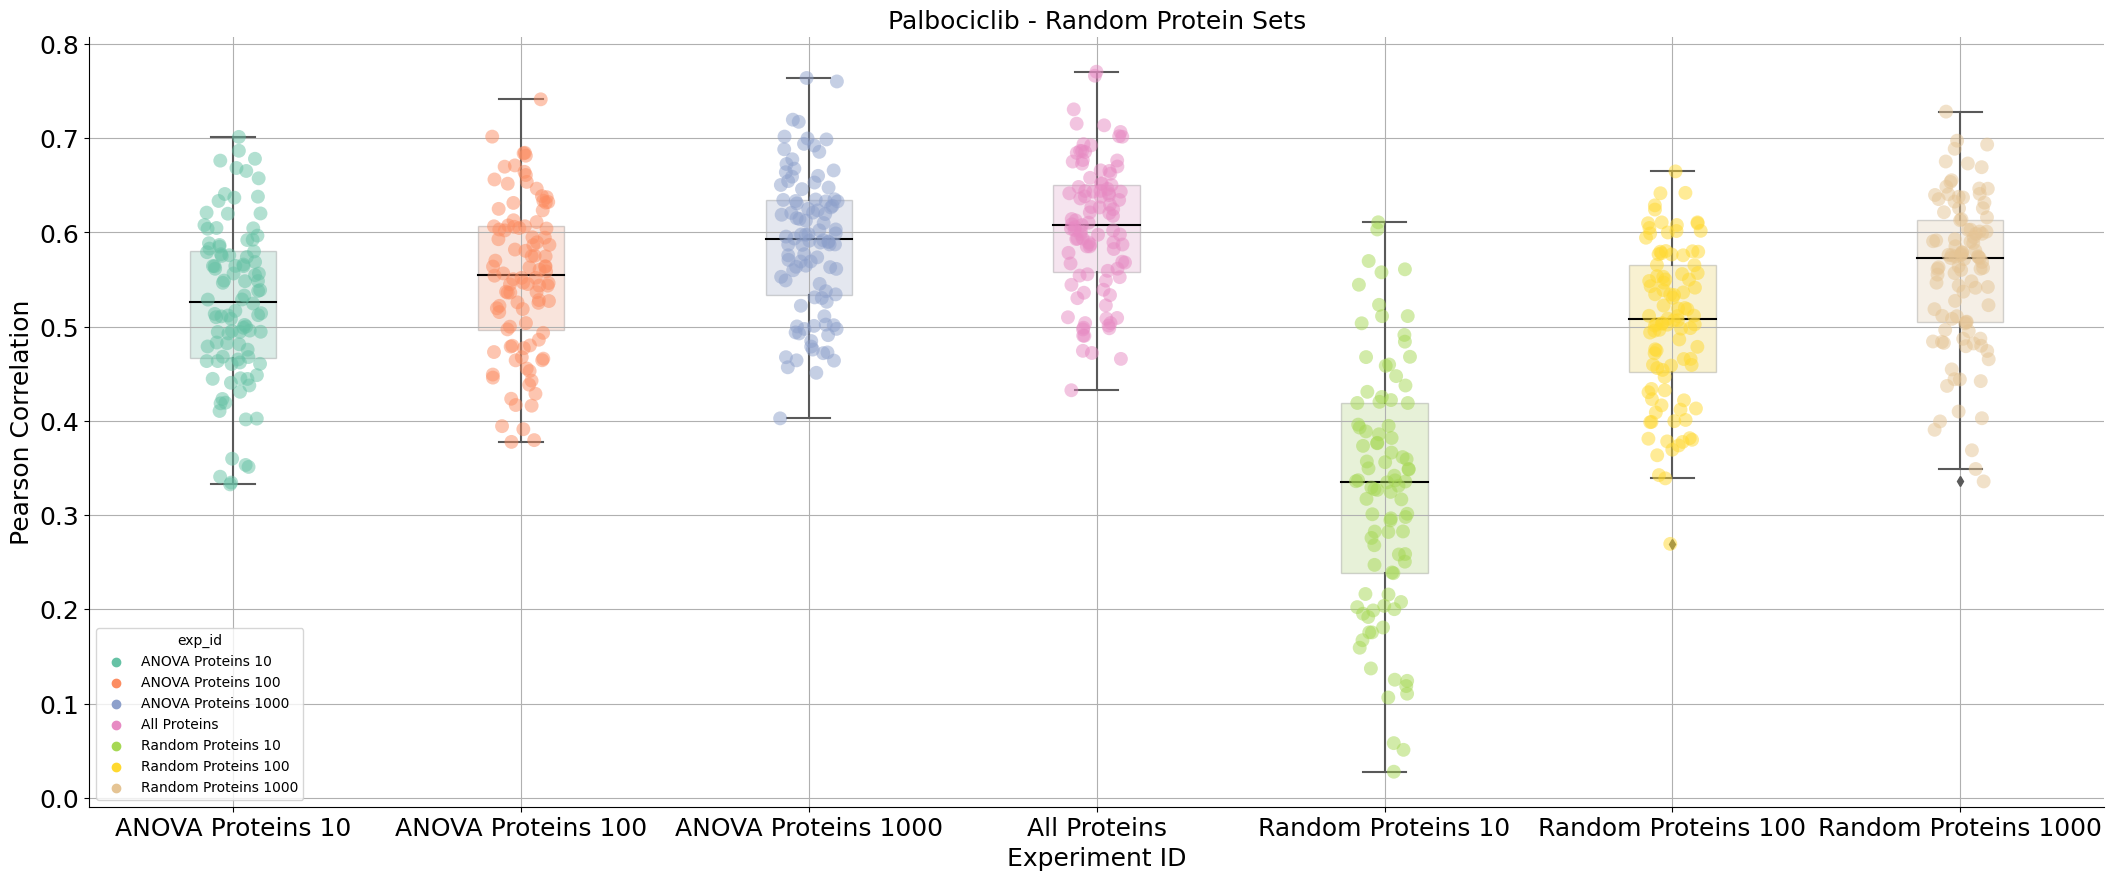

In [49]:
# visualise the combined df as a boxplot

fig, ax = plt.subplots(figsize=(26, 10))

vis.plot_box_plot(collection_df_random_proteome_combined, 'exp_id', 'pearson_corr', 'Palbociclib - Random Protein Sets',
                    'Experiment ID', 'Pearson Correlation', ax=ax)  

plt.grid()
sns.despine()

# show the plot
plt.show()

In [50]:
# obtain mean and 1st and 3rd quartile for each experiment

mean = collection_df_random_proteome_combined.groupby('exp_id')['pearson_corr'].mean()
q1 = collection_df_random_proteome_combined.groupby('exp_id')['pearson_corr'].quantile(0.25)
q3 = collection_df_random_proteome_combined.groupby('exp_id')['pearson_corr'].quantile(0.75)

# print the mean, 1st and 3rd quartile

print(f'mean: {mean}')
print(f'1st quartile: {q1}')
print(f'3rd quartile: {q3}')

mean: exp_id
ANOVA Proteins 10       0.524744
ANOVA Proteins 100      0.552709
ANOVA Proteins 1000     0.588571
All Proteins            0.605469
Random Proteins 10      0.325589
Random Proteins 100     0.503521
Random Proteins 1000    0.557147
Name: pearson_corr, dtype: float64
1st quartile: exp_id
ANOVA Proteins 10       0.467118
ANOVA Proteins 100      0.496217
ANOVA Proteins 1000     0.533507
All Proteins            0.558404
Random Proteins 10      0.238380
Random Proteins 100     0.452257
Random Proteins 1000    0.504464
Name: pearson_corr, dtype: float64
3rd quartile: exp_id
ANOVA Proteins 10       0.580589
ANOVA Proteins 100      0.606556
ANOVA Proteins 1000     0.634672
All Proteins            0.650681
Random Proteins 10      0.419010
Random Proteins 100     0.565400
Random Proteins 1000    0.613267
Name: pearson_corr, dtype: float64


# Visualisation

visualisation should be independent from computation so to reduce unnecessary computing time, load everything from pickle caches 

In [51]:
# loading libraries

import Visualisation as vis
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# load linear regression bulk run from pickle 

import pickle

with open('data/processed-results/elastic_net_fine_tune_results_ccle_palbociclib.pkl', 'rb') as f:
    collection_df_gene_fine_tune = pickle.load(f)

In [53]:
collection_df_gene_fine_tune.head()

,exp_id,random_seed,score,y_pred,y_test,selected_features,pearson_corr,pearson_p_val,r_squared
0,ANOVA 10 Genes (LR),519,1.259494,"[1.1740957548552455, 2.7871198051706045, 3.534...","[0.348878, 2.764856, 2.723005, 4.993982, 4.181...","[WAS, ARHGAP15, AMOTL2, NCKAP1L, SDC4, LAMA5, ...",0.710778,2.848080e-10,0.503251
1,ANOVA 100 Genes (LR),519,1.354956,"[1.7291481341587245, 2.713987983028508, 3.4936...","[0.348878, 2.764856, 2.723005, 4.993982, 4.181...","[TSPAN6, ITGAL, ITGA3, TNFRSF12A, BAIAP2L1, TR...",0.700671,6.488889e-10,0.465600
2,ANOVA 1000 Genes (LR),519,2.746715,"[1.9370972453094009, 1.0534405030152945, 3.599...","[0.348878, 2.764856, 2.723005, 4.993982, 4.181...","[TSPAN6, FGR, FUCA2, CD38, PRSS22, ITGAL, ITGA...",0.530287,1.561978e-05,-0.083315
3,All Genes (LR),519,1.441207,"[1.4440131596278256, 2.3537034380725466, 2.565...","[0.348878, 2.764856, 2.723005, 4.993982, 4.181...","[TSPAN6, TNMD, DPM1, SCYL3, C1orf112, FGR, CFH...",0.685445,2.108146e-09,0.431583
4,ANOVA 10 Genes (LR),316,1.827212,"[3.0637815153623897, 3.9567724484747195, 1.159...","[3.542085, 2.335321, 0.199181, 4.092189, 5.497...","[WAS, TJP1, AMOTL2, NCKAP1L, SDC4, SLC49A4, TU...",0.592863,7.518897e-07,0.346389


### Linear Regression Visualisation

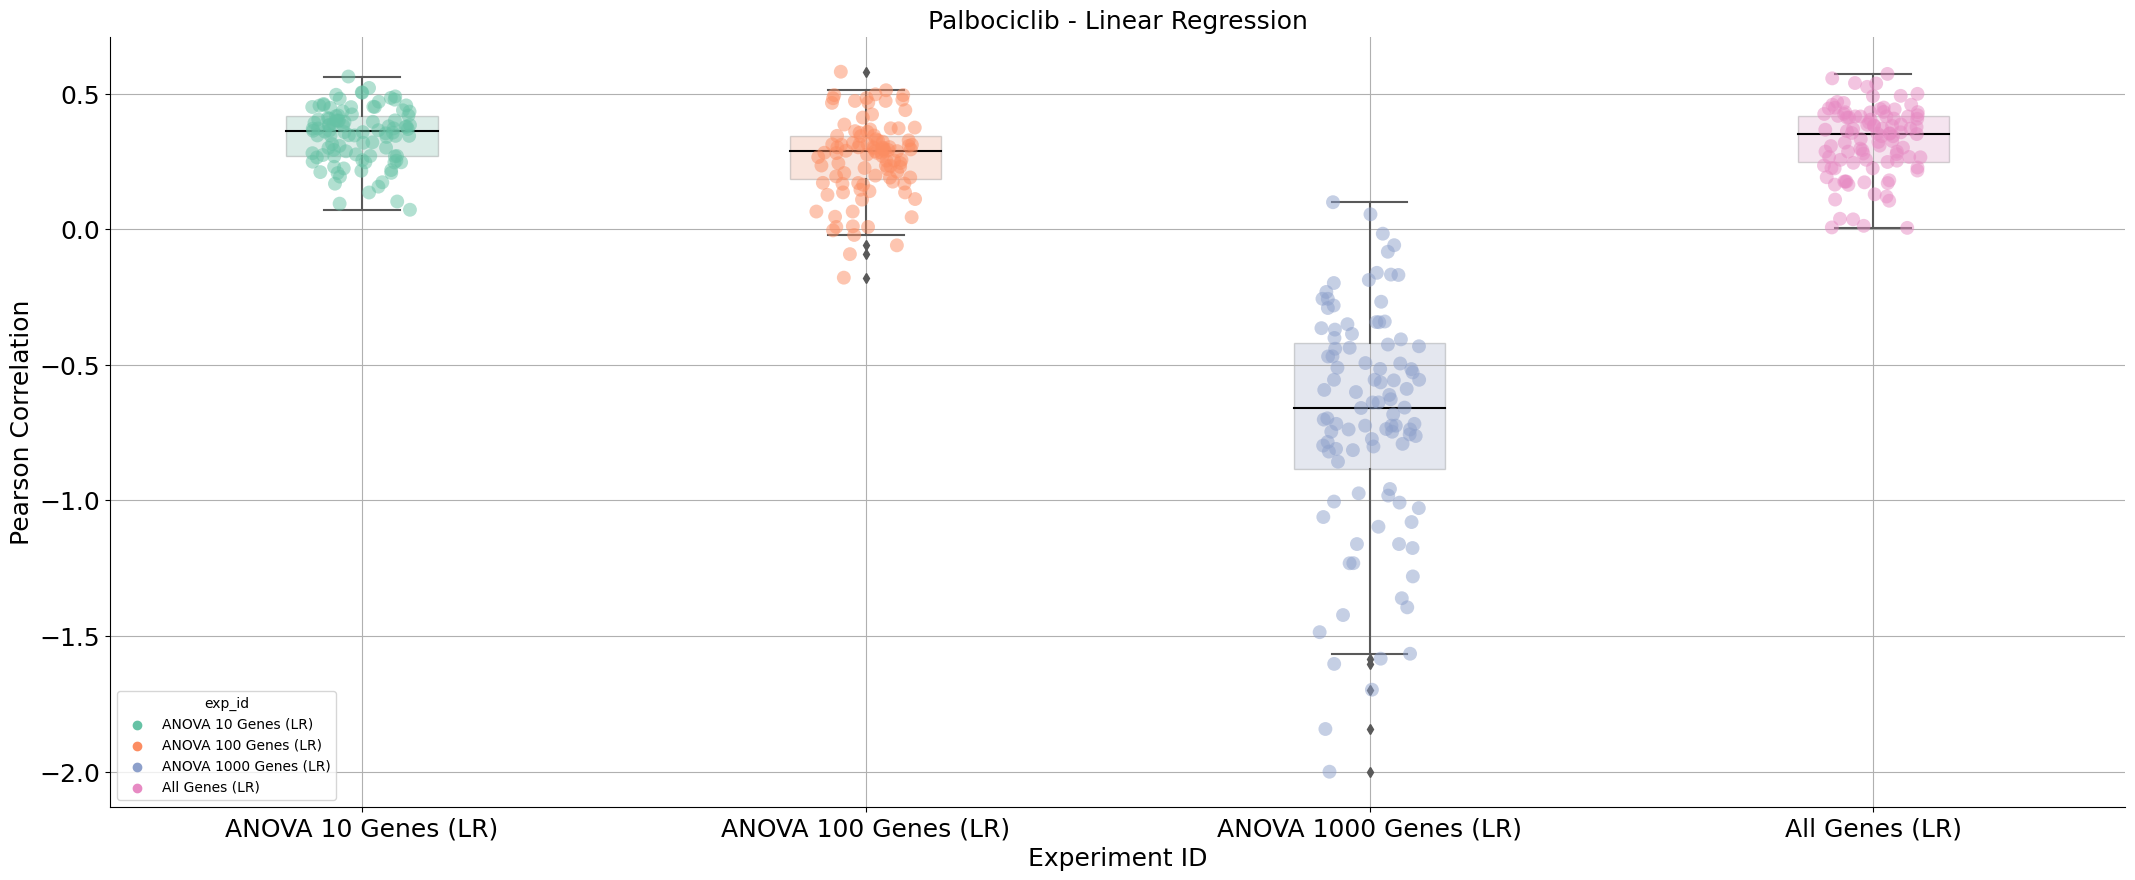

In [54]:
# visualise collection df as a boxplot

fig, ax = plt.subplots(figsize=(26, 10))

vis.plot_box_plot(collection_df_gene_fine_tune, 'exp_id', 'r_squared', 'Palbociclib - Linear Regression',
                    'Experiment ID', 'Pearson Correlation', ax=ax)          

plt.grid()
sns.despine()

# show the plot
plt.show()